---
# EDA

In [1623]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import matplotlib

In [1624]:
# func 모음

# 1. 종목코드를 6자리로 통일. ex) 990 -> 000990
def padding(x):
    x = str(x)
    return x.rjust(6, "0")

# 2. True, False 반전
def func_not(x):
    return not x

In [1625]:
df_부실징후 = pd.read_csv("./datasets/부실징후_전처리끝.csv", index_col=0)
df_부실징후["거래소코드"] = df_부실징후["거래소코드"].map(padding)
print(df_부실징후.shape[0])
df_부실징후

1055


회사명   거래소코드    회계년도  회생여부  이자보상배율(이자비용)  부가가치(백만원)  금융비용(백만원)  \
0         케이알모터스(주)  000040  2012.0     0         -6.47  -24385.88     726.84   
1             (주)경방  000050  2012.0     1          0.36   80728.78   19777.92   
2          (주)삼양홀딩스  000070  2013.0     1          0.14  196611.70   -1771.25   
3             (주)두산  000150  2015.0     1          0.38  527761.46   93973.48   
4         성창기업지주(주)  000180  2012.0     0          0.04  162825.36    7041.44   
...             ...     ...     ...   ...           ...        ...        ...   
1050         (주)아스타  246720  2018.0     0        -22.95    -929.19    -333.43   
1051         (주)모비스  250060  2018.0     0        -24.34    2070.53     -86.30   
1052  (주)어스앤에어로스페이스  263540  2018.0     0         -8.57   10960.84     438.66   
1053      (주)데이타솔루션  263800  2018.0     1         -9.93   13556.08     258.29   
1054        (주)휴엠앤씨  263920  2018.0     0         -0.53    5593.92     113.04   

      매출액총이익률  매출액순이익률  총자본사업이익률  ...          KZ지수    산업매출성장률          WW지수  \
0        5.87    -8.41     -4.72  ... -1.081775e+11   5.164151  3.482079e+09   
1       21.82    -2.37      0.56  ... -2.635866e+10   8.167757  3.467151e+09   
2       13.02    -1.13      0.83  ... -2.243978e+11   8.684003  1.241074e+09   
3       15.78    -8.97      1.01  ... -7.488413e+10 -11.916159  1.823412e+09   
4       15.69    11.23      0.24  ... -1.682903e+11  10.034438  3.759153e+09   
...       ...      ...       ...  ...           ...        ...           ...   
1050    59.85  -175.52    -14.10  ... -1.545284e+10   2.340424  1.086485e+10   
1051    26.81   -14.17     -4.83  ... -3.375271e+11   6.732754  2.560419e+09   
1052    -2.33    -6.62     -6.32  ... -3.314594e+10   2.340424  9.081511e+09   
1053     9.25    -4.07     -5.66  ... -2.273783e+11   6.843554  4.482685e+09   
1054    19.92    -0.29     -0.15  ... -1.403181e+11   2.340424 -8.383493e+09   

              CL지수    NCAV지수  기업생명주기  순매수거래량_기관  순매수거래대금 비중_기관  순매수거래량_외국인  \
0     3.448467e+11  0.053516       0    -9765.0      -0.000016   -268520.0   
1     2.466891e+11 -3.169267       1    13629.0       0.000848       861.0   
2     1.337212e+11  0.099707       4   102250.0       0.002022    -91060.0   
3     2.654888e+11 -1.378627       0  -426231.0      -0.001261   -625687.0   
4    -1.691402e+11  0.283752       4    -8032.0      -0.000052    -19720.0   
...            ...       ...     ...        ...            ...         ...   
1050  3.309446e+12  0.227212       0        0.0       0.000000   -139221.0   
1051  7.918994e+11  0.096525       0   -11056.0      -0.000038    -87368.0   
1052  9.816239e+11 -0.038339       0  -174925.0      -0.004617     -7660.0   
1053  3.188082e+11  0.360980       4  -245431.0      -0.002174     15552.0   
1054  1.534921e+11 -0.007319       1   -88123.0      -0.000739    -26129.0   

      순매수거래대금 비중_외국인  
0          -0.000200  
1           0.000042  
2          -0.001833  
3          -0.004927  
4          -0.000081  
...              ...  
1050       -0.001538  
1051       -0.001121  
1052       -0.000272  
1053       -0.000485  
1054       -0.000746  

[1055 rows x 94 columns]

전체 데이터 수 : 1055
청산기업 데이터 수 : 690
회생기업 데이터 수 : 365


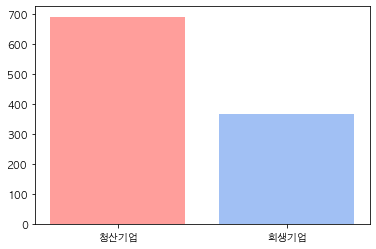

In [1626]:
import matplotlib.pyplot as plt
import numpy as np

print("전체 데이터 수 :", df_부실징후.shape[0])
print("청산기업 데이터 수 :", df_부실징후[df_부실징후["회생여부"]==0].shape[0])
print("회생기업 데이터 수 :", df_부실징후[df_부실징후["회생여부"]==1].shape[0])

# --------------
x = np.arange(2)
years = ['청산기업', '회생기업']
values = [df_부실징후[df_부실징후["회생여부"]==0].shape[0], df_부실징후[df_부실징후["회생여부"]==1].shape[0]]

plt.bar(x, values, color=["#FF9E9B", "#A1C0F4"])
plt.xticks(x, years)

plt.show()

In [1627]:
# df_부실징후.isna().sum().to_dict()

---
# Train Test split

In [1628]:
# target = "회생여부"

# # tain : 2012~2017
# train_set = df_부실징후[df_부실징후["회계년도"]!=2018]
# train_set.reset_index(drop=True, inplace=True)
# y_train = train_set[target]
# X_train = train_set.drop(["회사명","거래소코드","회계년도",target], axis=1)

# # test : 2018
# test_set = df_부실징후[df_부실징후["회계년도"]==2018]
# test_set.reset_index(drop=True, inplace=True)
# y_test = test_set[target]
# X_test = test_set.drop(["회사명","거래소코드","회계년도",target], axis=1)

---
# Scaling

In [1638]:
target = "회생여부"
y_scale = df_부실징후[target]
X_scale = df_부실징후.drop(["회사명","거래소코드","회계년도",target], axis=1)

In [1639]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler_stan = StandardScaler()
scaler_stan.fit(X_scale)
data_scaled_stan = scaler_stan.transform(X_scale)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled_stan = pd.DataFrame(data = data_scaled_stan, columns=X_scale.columns)
x_scaled_stan

이자보상배율(이자비용)  부가가치(백만원)  금융비용(백만원)   매출액총이익률   매출액순이익률  총자본사업이익률  \
0        -0.099354  -0.654294  -0.318244 -0.582084  0.251468 -0.063259   
1         0.730534   0.372174   0.724941  0.409289  0.418163  0.529331   
2         0.703802   1.503796  -0.455033 -0.137675  0.452385  0.559634   
3         0.732964   4.737546   4.787690  0.033872  0.236013  0.579836   
4         0.691652   1.173865   0.027526  0.028278  0.793502  0.493417   
...            ...        ...        ...       ...       ...       ...   
1050     -2.101777  -0.425234  -0.376302  2.773044 -4.360512 -1.116005   
1051     -2.270671  -0.395941  -0.362770  0.719442  0.092501 -0.075605   
1052     -0.354517  -0.309125  -0.334024 -1.091755  0.300869 -0.242832   
1053     -0.519766  -0.283782  -0.343901 -0.372000  0.371245 -0.168758   
1054      0.622393  -0.361534  -0.351854  0.291194  0.475567  0.449646   

       총자본순이익률  자기자본순이익률  경영자본순이익률   자본금순이익률  ...      KZ지수   산업매출성장률  \
0     0.051028  0.207554  0.172517  0.528453  ...  0.257482  0.101979   
1     0.361731  0.559251  0.518211  0.022122  ...  0.811111  0.663923   
2     0.341297  0.510816  0.553797 -0.006605  ... -0.528927  0.760507   
3     0.109187  0.087550  0.207377 -1.681962  ...  0.482762 -3.093570   
4     2.543991  1.056977  1.232839  1.633900  ... -0.149274  1.013160   
...        ...       ...       ...       ...  ...       ...       ...   
1050 -0.203613  0.181167 -0.513787  0.233471  ...  0.884906 -0.426311   
1051  0.325579  0.554913  0.523295  0.544368  ... -1.294420  0.395449   
1052  0.228648  0.421174  0.387487  0.213259  ...  0.765185 -0.426311   
1053  0.027974  0.079959  0.072295  0.217477  ... -0.549094  0.416178   
1054  0.382166  0.593951  0.623517  0.613439  ...  0.040001 -0.426311   

          WW지수      CL지수    NCAV지수    기업생명주기  순매수거래량_기관  순매수거래대금 비중_기관  \
0     0.220376 -0.317771  0.415598 -1.114042   0.024533       0.096238   
1     0.218310 -0.405031 -2.262724 -0.344353   0.038086       0.300387   
2    -0.089646 -0.505457  0.453985  1.964712   0.089427       0.577339   
3    -0.009085 -0.388318 -0.774597 -1.114042  -0.216738      -0.197528   
4     0.258706 -0.774695  0.606938  1.964712   0.025537       0.087807   
...        ...       ...       ...       ...        ...            ...   
1050  1.241712  2.317700  0.559950 -1.114042   0.030190       0.100079   
1051  0.092873  0.079650  0.451341 -1.114042   0.023785       0.091155   
1052  0.995003  0.248312  0.339261 -1.114042  -0.071149      -0.989799   
1053  0.358800 -0.340918  0.671118  1.964712  -0.111995      -0.413133   
1054 -1.421112 -0.487881  0.365041 -0.344353  -0.020862      -0.074404   

      순매수거래량_외국인  순매수거래대금 비중_외국인  
0      -0.123460        0.068885  
1       0.053200        0.152273  
2      -0.007082       -0.493950  
3      -0.357690       -1.560362  
4       0.039703        0.110014  
...          ...             ...  
1050   -0.038666       -0.392284  
1051   -0.004660       -0.248491  
1052    0.047612        0.043964  
1053    0.062834       -0.029470  
1054    0.035500       -0.119446  

[1055 rows x 90 columns]

In [635]:
from sklearn.preprocessing import RobustScaler

# StandardScaler객체 생성
scaler_robust = RobustScaler()
scaler_robust.fit(X_scale)
data_scaled_robust = scaler_robust.transform(X_scale)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled_robust = pd.DataFrame(data = data_scaled_robust, columns=X_scale.columns)
x_scaled_robust

이자보상배율(이자비용)  이자보상배율(이자비용)_전년도  부가가치(백만원)  법인세비용차감전(계속사업)손익(백만원)  \
0        -0.481333          0.120383  -1.152859              -0.328411   
1        -0.230902         -1.462836  -0.079771              -0.183650   
2         0.303274         -0.072959   2.541504              -0.511833   
3         0.278001         -0.027360   6.798863              -0.494606   
4         0.305572         -0.021888  20.332517             -15.224567   
...            ...               ...        ...                    ...   
1407     -4.006893         -4.010944  -0.456223              -0.308925   
1408     -0.089604         -3.222982  -0.386109              -0.108148   
1409     -0.120620          9.575923  -0.259478               0.038993   
1410     -0.327398        -13.521204  -1.095062              -1.912815   
1411      0.079265         -0.984952  -0.174473               0.052269   

       인건비(백만원)  금융비용(백만원)  감가상각비(백만원)   매출액총이익률   매출액순이익률  총자본사업이익률  ...  \
0     -0.536716  -0.077191    0.052250 -0.306101 -0.242487 -0.476708  ...   
1     -0.051526  -0.118269    0.038215 -0.201430 -0.120900 -0.173913  ...   
2      0.550953   6.287718    2.510470  0.664537  0.172420  0.343168  ...   
3      6.755766  -0.899281    6.908575  0.129013  0.257599  0.385093  ...   
4     20.448245  19.559535   28.376405  0.296972 -0.280955  0.413043  ...   
...         ...        ...         ...       ...       ...       ...  ...   
1407  -0.312312  -0.332876   -0.254402 -0.618287 -1.711145 -0.970497  ...   
1408  -0.395009   0.079670   -0.297148  0.279325 -1.295552 -0.986025  ...   
1409  -0.209940  -0.446649   -0.370567  0.931690 -0.456809  0.113354  ...   
1410  -0.428357   0.556951   -0.329653 -1.071657 -6.768332 -3.951863  ...   
1411  -0.236261   0.280700   -0.237850  0.024951 -0.043277 -0.476708  ...   

          WW지수    NCAV지수  영업흐름_플마_영업  영업흐름_플마_투자  영업흐름_플마_재무    기업생명주기  \
0     0.308910  0.119879        -1.0         0.0         0.0 -0.333333   
1    -0.252686  0.053786         0.0         0.0         0.0  0.000000   
2     0.306884 -3.978965         0.0         0.0         0.0  0.000000   
3     0.004888  0.178626        -1.0         1.0        -1.0  1.000000   
4     0.073338 -1.022642        -1.0         0.0         0.0 -0.333333   
...        ...       ...         ...         ...         ...       ...   
1407  0.521840  0.465139        -1.0         0.0         0.0 -0.333333   
1408  0.861808 -0.193770        -1.0         1.0        -1.0  1.000000   
1409 -0.266707  0.310794         0.0         0.0         0.0  0.000000   
1410  2.267994 -0.136333        -1.0         0.0         0.0 -0.333333   
1411 -0.016631  0.315424        -1.0         0.0         0.0 -0.333333   

      순매수거래량_기관  순매수거래대금 비중_기관  순매수거래량_외국인  순매수거래대금 비중_외국인  
0     -0.106050      -0.019911   -1.758486       -0.094413  
1      0.001783       0.013984    4.362031        0.842355  
2      0.148274       1.078229    0.005639        0.058382  
3      1.111703       2.567987   -0.596335       -1.125721  
4     -4.633592      -1.600107   -4.097505       -3.079754  
...         ...            ...         ...             ...  
1407  -0.054715      -0.030099   -0.139509        0.141085  
1408  -0.573691      -2.556378   -0.156032       -0.623151  
1409   0.000065       0.000342    0.305260        0.060607  
1410   0.061760      -0.043567   -4.885013       -1.471054  
1411 -60.430027      -7.554661   -3.296959       -0.527144  

[1412 rows x 148 columns]

In [234]:
from sklearn.preprocessing import MinMaxScaler

# StandardScaler객체 생성
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X_scale)
data_scaled_minmax = scaler_minmax.transform(X_scale)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled_minmax = pd.DataFrame(data = data_scaled_minmax, columns=X_scale.columns)
x_scaled_minmax

이자보상배율(이자비용)  부가가치(백만원)  금융비용(백만원)   매출액총이익률   매출액순이익률  총자본사업이익률  \
0         0.953828   0.000000   0.040183  0.403676  0.761246  0.846915   
1         0.967321   0.049945   0.038175  0.419247  0.766125  0.875291   
2         0.996101   0.171948   0.351291  0.548072  0.777894  0.923749   
3         0.994739   0.370099   0.000000  0.468405  0.781312  0.927678   
4         0.996225   1.000000   1.000000  0.493391  0.759702  0.930297   
...            ...        ...        ...       ...       ...       ...   
1262      0.979204   0.063062   0.030391  0.892359  0.777040  0.906141   
1263      0.763879   0.032424   0.027685  0.357233  0.702315  0.800640   
1264      0.974933   0.035687   0.047850  0.490766  0.718991  0.799185   
1265      0.973262   0.041581   0.022124  0.587815  0.752646  0.902212   
1266      0.984032   0.045537   0.057676  0.452924  0.769239  0.846915   

       총자본순이익률  자기자본순이익률  경영자본순이익률   자본금순이익률  ...     LEV지수      KZ지수  \
0     0.444787  0.729851  0.736971  0.417973  ...  0.000000  0.794327   
1     0.447715  0.732459  0.743821  0.418917  ...  0.000000  0.832559   
2     0.463658  0.765594  0.772409  0.387481  ...  0.436469  0.934859   
3     0.462417  0.760672  0.776057  0.385751  ...  0.095100  0.584560   
4     0.448320  0.717655  0.740545  0.284858  ...  0.132288  0.643667   
...        ...       ...       ...       ...  ...       ...       ...   
1262  0.456339  0.753471  0.757743  0.349125  ...  0.033226  0.572556   
1263  0.425980  0.681728  0.688133  0.299814  ...  0.032207  0.000000   
1264  0.421302  0.673132  0.680986  0.352125  ...  0.226482  0.893245   
1265  0.440905  0.723349  0.708904  0.368107  ...  0.016580  0.378156   
1266  0.445583  0.736133  0.717540  0.407287  ...  0.000455  0.476728   

          WW지수      CL지수    NCAV지수  기업생명주기  순매수거래량_기관  순매수거래대금 비중_기관  \
0     0.502097  0.143438  0.855079    0.00   0.354668       0.629314   
1     0.376160  0.125344  0.851813    0.25   0.354838       0.629763   
2     0.501643  0.115649  0.652505    0.25   0.355069       0.643872   
3     0.433920  0.083666  0.857983    1.00   0.356589       0.663622   
4     0.449270  0.103114  0.798613    0.00   0.347525       0.608365   
...        ...       ...       ...     ...        ...            ...   
1262  0.454276  0.109884  0.856308    0.00   0.363322       0.704407   
1263  0.549846  0.397927  0.872143    0.00   0.354749       0.629179   
1264  0.626083  0.321356  0.839578    1.00   0.353930       0.595688   
1265  0.373015  0.198279  0.864515    0.25   0.354835       0.629582   
1266  0.429095  0.165663  0.864744    0.00   0.259500       0.529425   

      순매수거래량_외국인  순매수거래대금 비중_외국인  
0       0.446283        0.753986  
1       0.464870        0.781614  
2       0.451640        0.758492  
3       0.449812        0.723569  
4       0.439179        0.665938  
...          ...             ...  
1262    0.445415        0.690335  
1263    0.451199        0.760931  
1264    0.451149        0.738392  
1265    0.452550        0.758558  
1266    0.441610        0.741223  

[1267 rows x 84 columns]

---
## EDA

### 1. Data type

In [41]:
df_부실징후.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1535 entries, 0 to 1534
Data columns (total 88 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   회사명                  1535 non-null   object 
 1   거래소코드                1535 non-null   object 
 2   회계년도                 1535 non-null   float64
 3   회생여부                 1535 non-null   int64  
 4   이자보상배율(이자비용)         1535 non-null   float64
 5   부가가치(백만원)            1535 non-null   float64
 6   금융비용(백만원)            1535 non-null   float64
 7   매출액총이익률              1535 non-null   float64
 8   매출액순이익률              1535 non-null   float64
 9   총자본사업이익률             1535 non-null   float64
 10  총자본순이익률              1535 non-null   float64
 11  자기자본순이익률             1535 non-null   float64
 12  경영자본순이익률             1535 non-null   float64
 13  자본금순이익률              1535 non-null   float64
 14  매출원가대매출액비율           1535 non-null   float64
 15  영업비용대영업수익비율          1535 non-null   f

#### 2. 기술통계량

In [48]:
x_scaled_robust.describe().T

count      mean        std         min       25%  50%  \
이자보상배율(이자비용)    1535.0 -1.253635   4.282247  -24.594888 -0.696359  0.0   
부가가치(백만원)       1535.0  1.123902   3.649449   -1.108046 -0.313385  0.0   
금융비용(백만원)       1535.0  1.093079   3.514747   -0.909159 -0.294541  0.0   
매출액총이익률         1535.0  0.250271   1.010587   -3.063634 -0.359361  0.0   
매출액순이익률         1535.0 -0.676108   2.416065  -20.333938 -0.729583  0.0   
...                ...       ...        ...         ...       ...  ...   
기업생명주기          1535.0  0.150706   0.431136   -0.333333 -0.333333  0.0   
순매수거래량_기관       1535.0 -0.842135  14.102565 -179.125969 -0.879091  0.0   
순매수거래대금 비중_기관   1535.0 -0.567870   4.652699  -42.269376 -0.879763  0.0   
순매수거래량_외국인      1535.0  0.025207   8.014930 -126.001420 -0.438160  0.0   
순매수거래대금 비중_외국인  1535.0 -0.150068   1.780249  -24.429071 -0.594031  0.0   

                     75%         max  
이자보상배율(이자비용)    0.303641    0.435321  
부가가치(백만원)       0.686615   18.592589  
금융비용(백만원)       0.705459   18.069790  
매출액총이익률         0.640639    3.727636  
매출액순이익률         0.270417    6.003630  
...                  ...         ...  
기업생명주기          0.666667    1.000000  
순매수거래량_기관       0.120909  325.688746  
순매수거래대금 비중_기관   0.120237   31.229644  
순매수거래량_외국인      0.561840  152.995397  
순매수거래대금 비중_외국인  0.405969    8.881558  

[84 rows x 8 columns]

#### 3. Boxplot

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_28580/3278788020.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


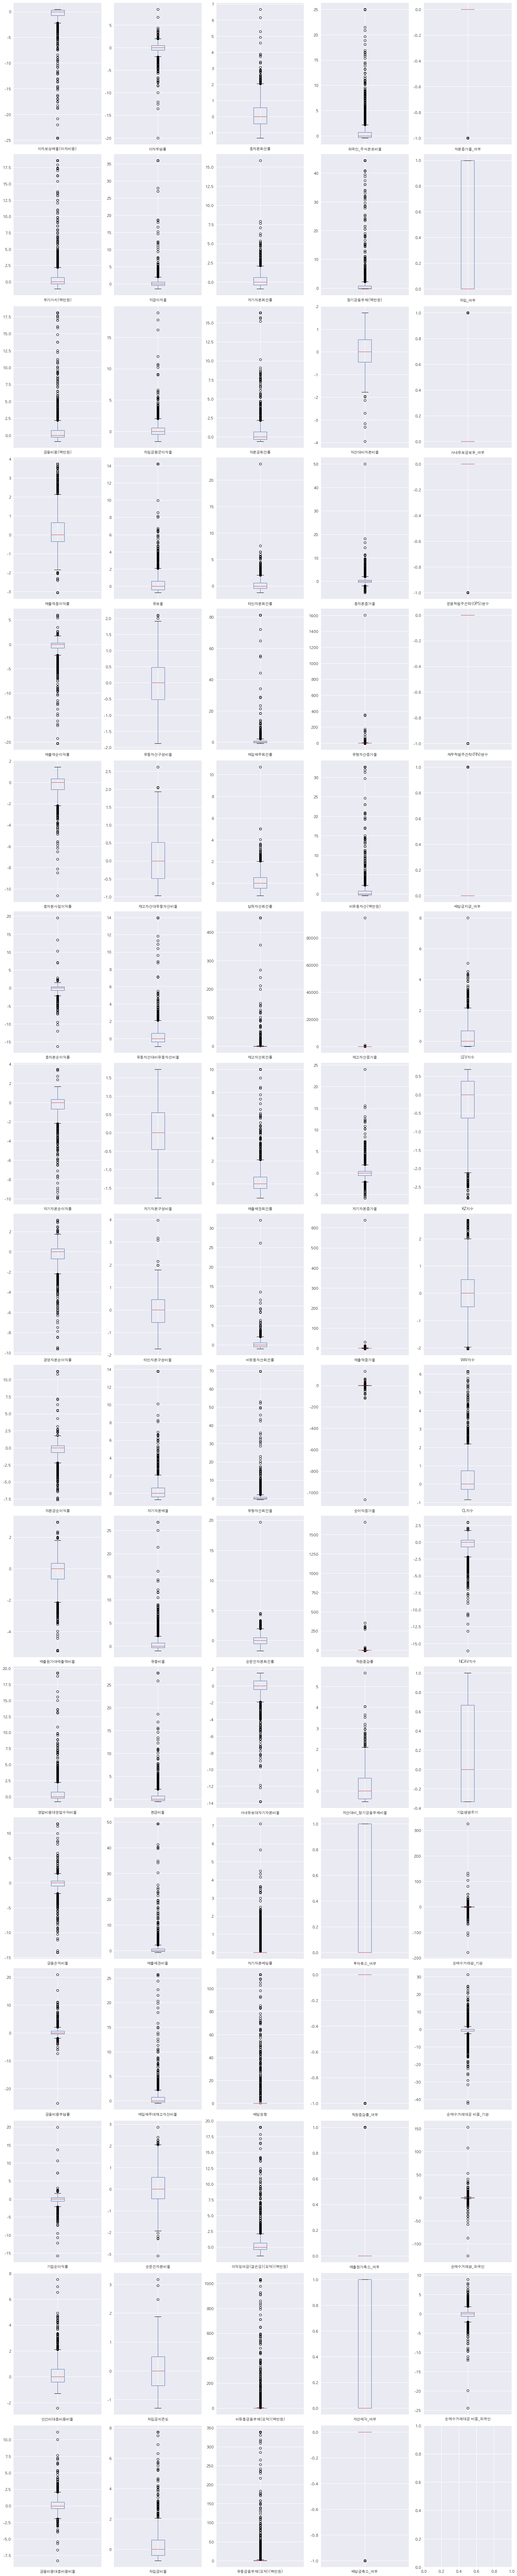

In [49]:
df_부실징후_outlier = x_scaled_robust
%matplotlib inline
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

ncols = 5
nrows = 17

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)

fig.set_size_inches((20, 100))

for col, ax in zip(df_부실징후_outlier.columns, axs.T.ravel()):
    df_부실징후_outlier[[col]].boxplot(ax=ax)
    
plt.show()

#### 4. Distplot

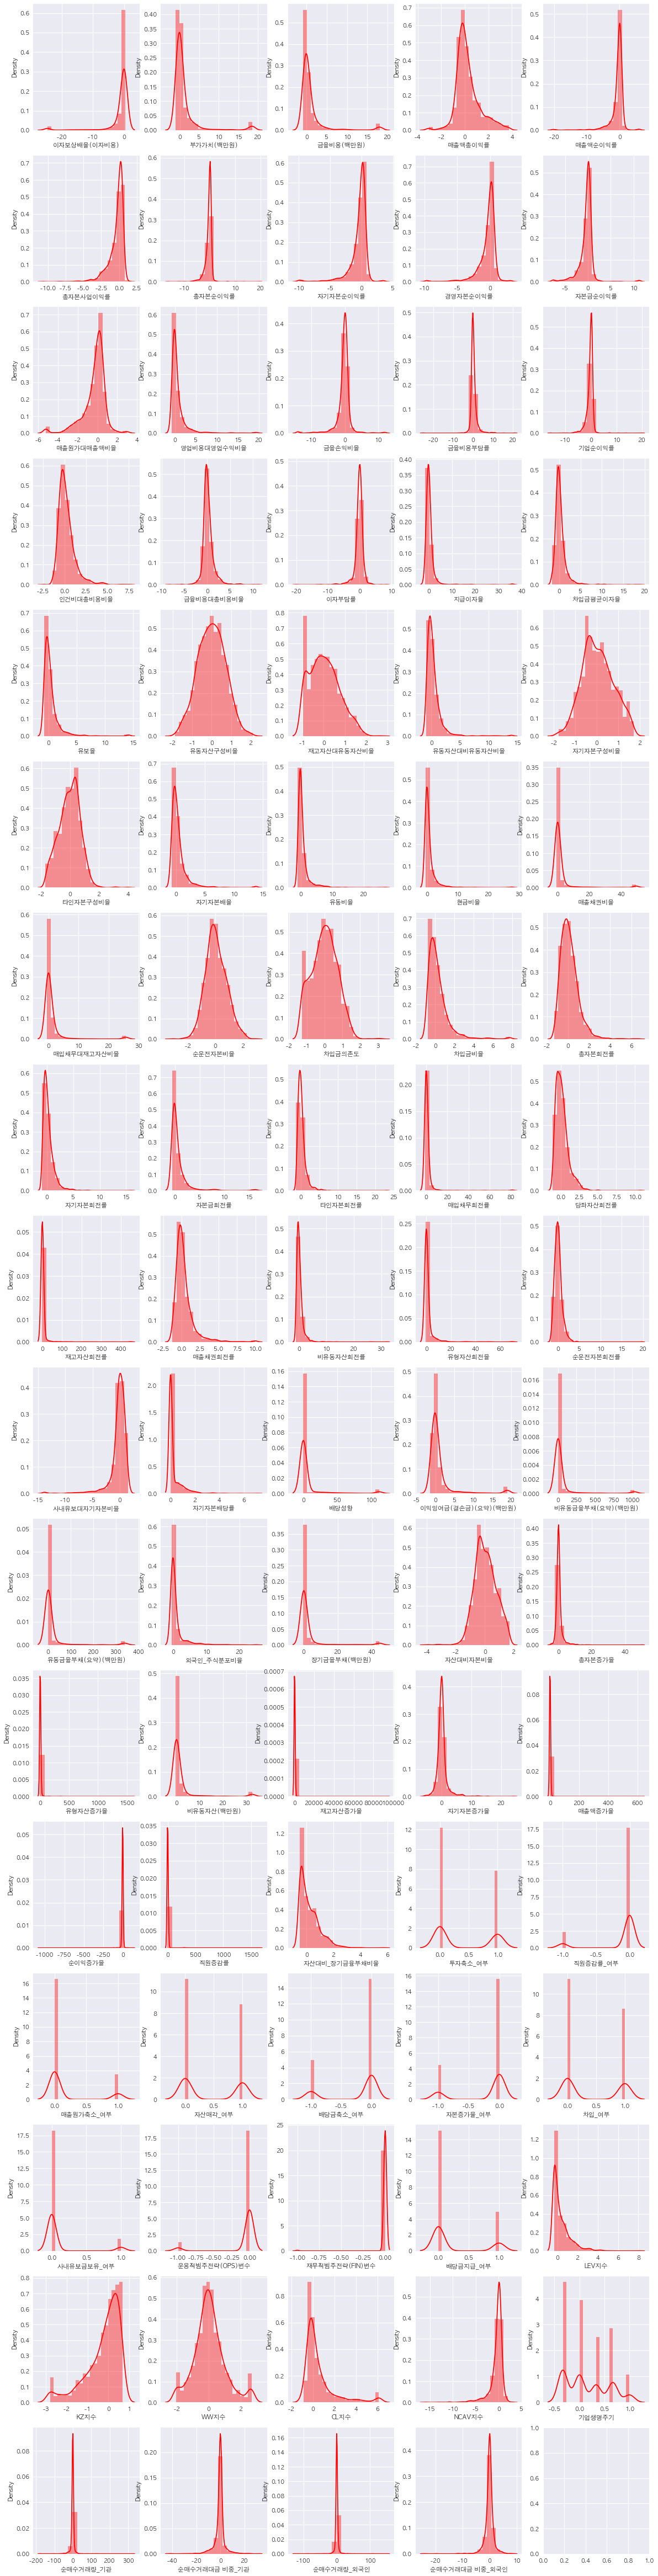

In [50]:
# distplot
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
col_n = 5
row_n = 17

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i, col in enumerate(x_scaled_robust.columns[:]):
    sns.distplot(x_scaled_robust[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)] , color='red')

#### 5. QQplot

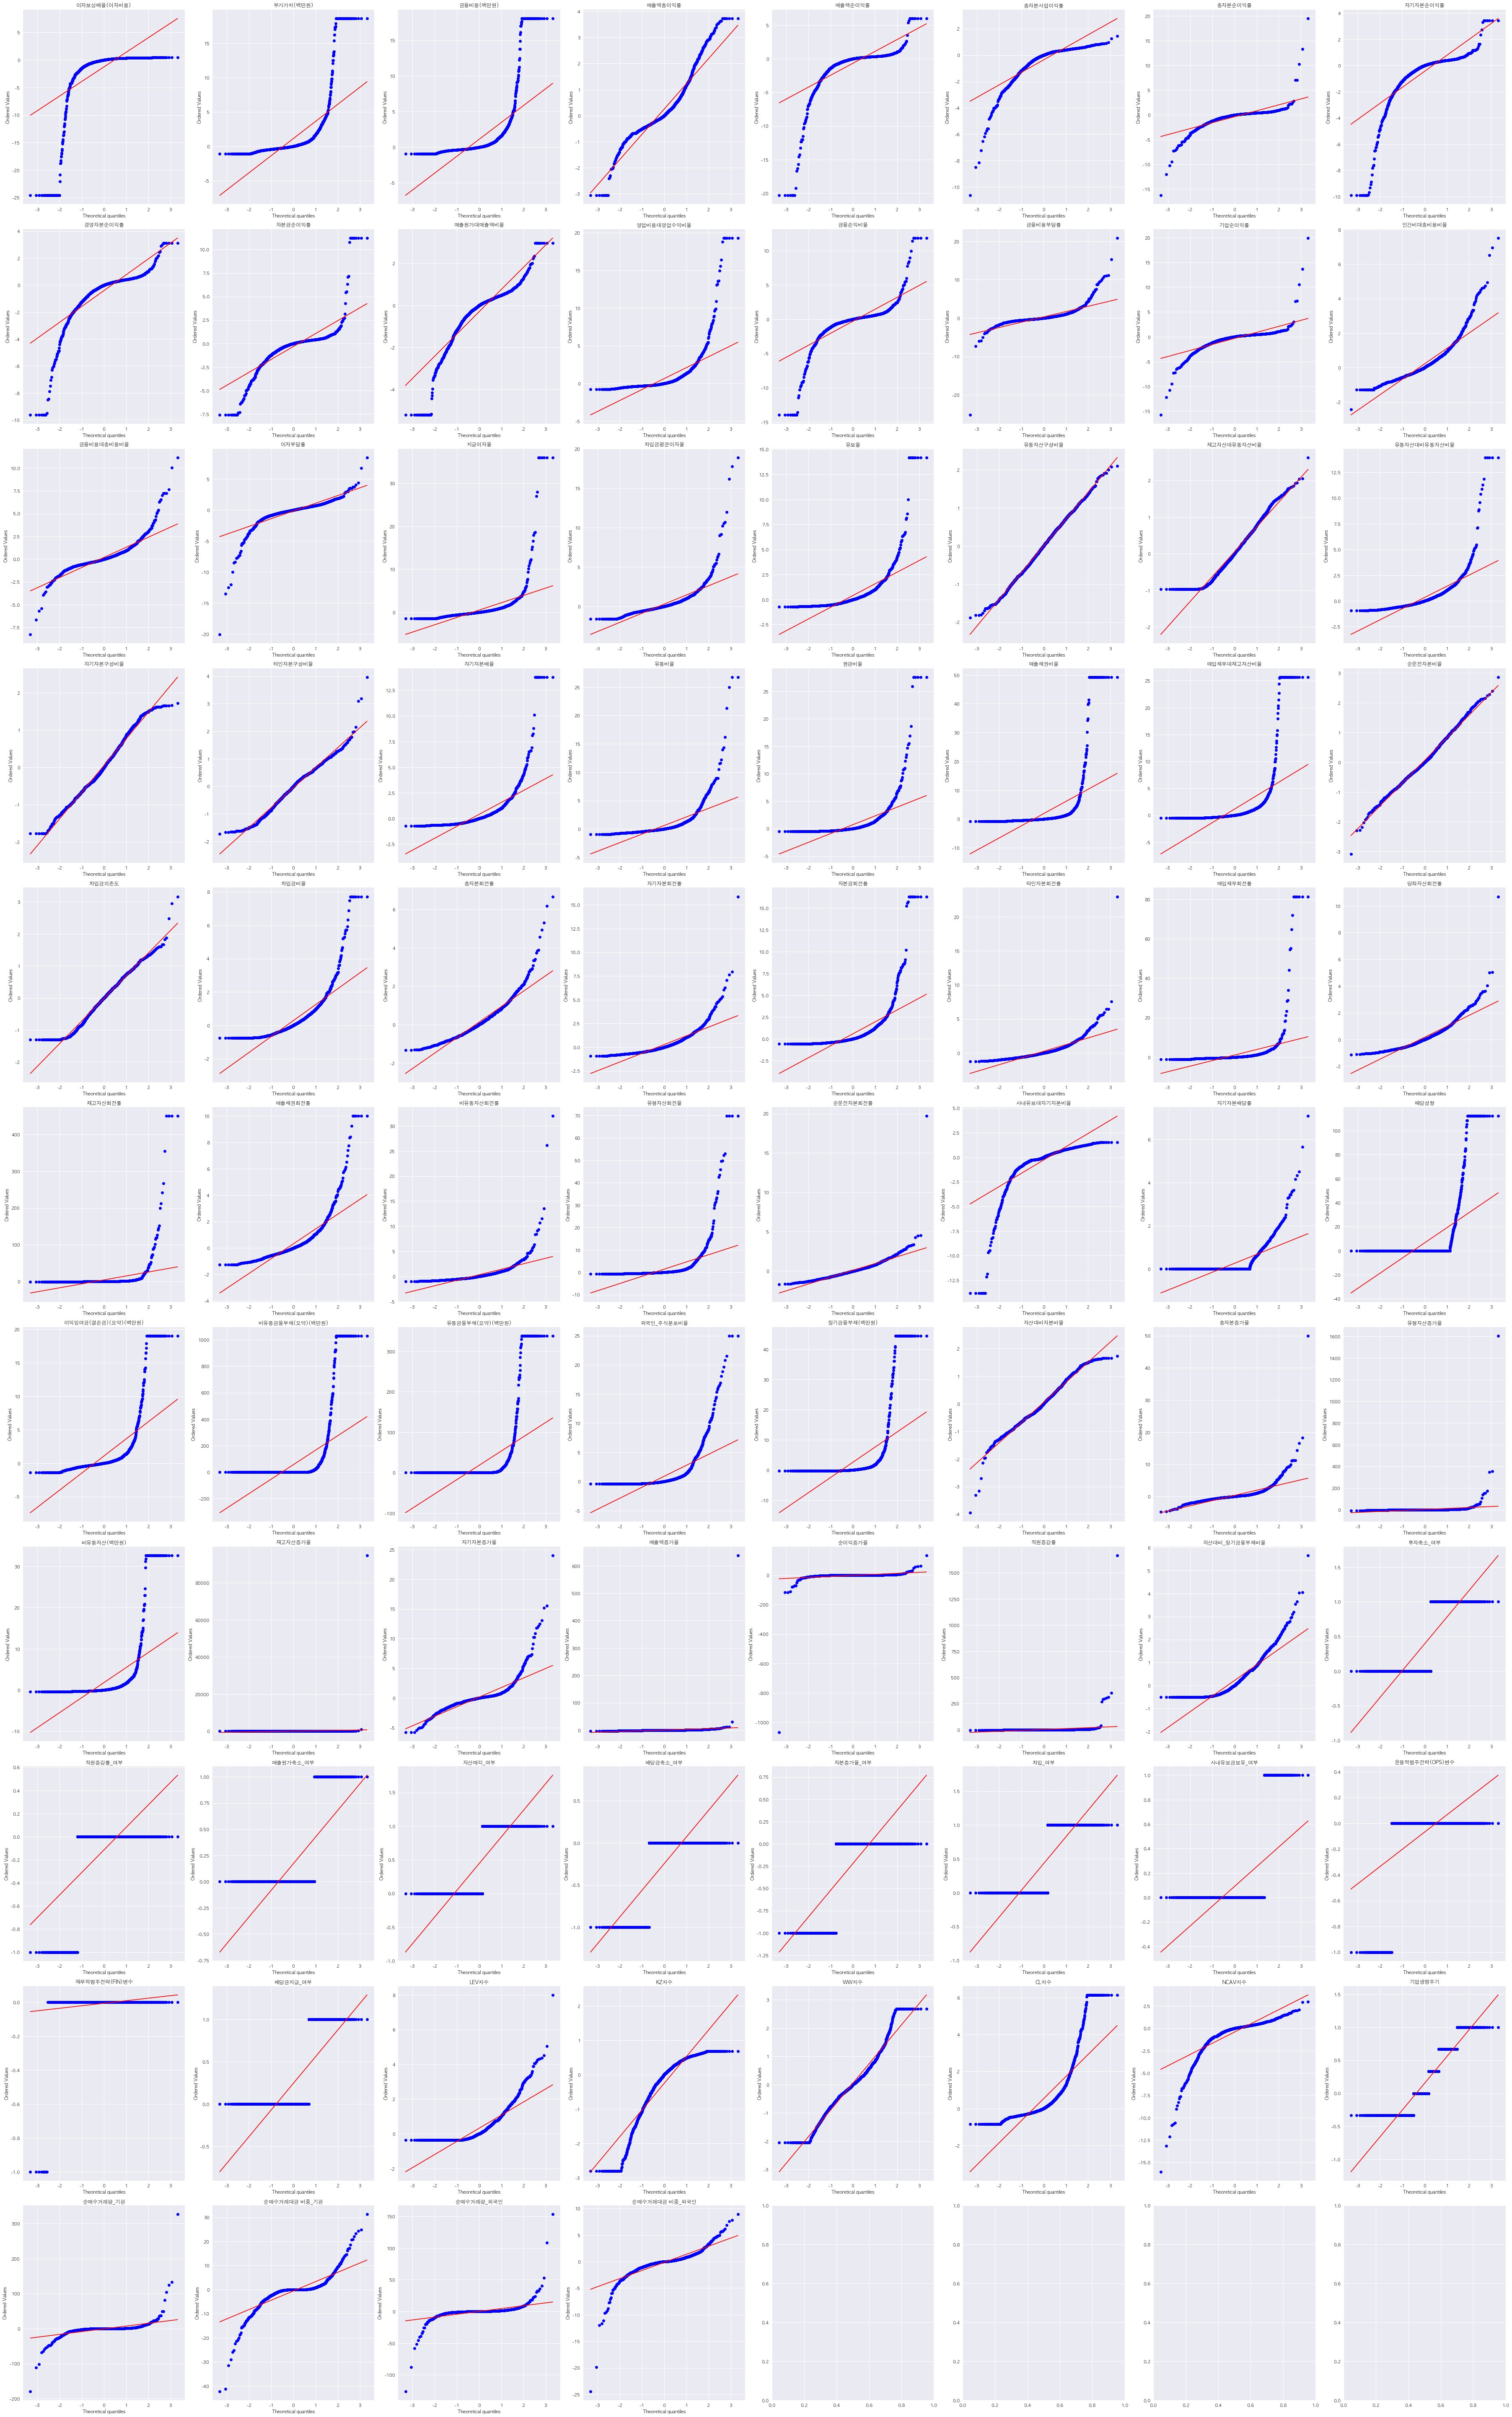

In [51]:
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"
# 85
ncols = 8
nrows = 11

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
fig.set_size_inches((50, 80))

for ax, i in zip(axs.ravel(), x_scaled_robust):
        stats.probplot(x_scaled_robust[i], dist=stats.norm, plot=ax)
        ax.set_title(str(i))

plt.show()

#### 6. 샤피로 테스트

In [52]:
from scipy import stats
from scipy.stats import shapiro

def Shapiro(x_scaled_robust):
    Shapi = []
    Shapi.append([col for col in x_scaled_robust])
    for i in Shapi:
        for j in i:
            shapiro_test,p_val = shapiro(x_scaled_robust[j])
            print(j,"Test-statistics : {}, p-value : {}". format(shapiro_test,p_val))

Shapiro(x_scaled_robust.iloc[:,:])

이자보상배율(이자비용) Test-statistics : 0.38219577074050903, p-value : 0.0
부가가치(백만원) Test-statistics : 0.4647195339202881, p-value : 0.0
금융비용(백만원) Test-statistics : 0.4535812735557556, p-value : 0.0
매출액총이익률 Test-statistics : 0.9154991507530212, p-value : 1.9606208778811325e-28
매출액순이익률 Test-statistics : 0.5387294292449951, p-value : 0.0
총자본사업이익률 Test-statistics : 0.7528570890426636, p-value : 5.016648502282845e-43
총자본순이익률 Test-statistics : 0.6573109030723572, p-value : 0.0
자기자본순이익률 Test-statistics : 0.6735442876815796, p-value : 0.0
경영자본순이익률 Test-statistics : 0.7210065722465515, p-value : 7.006492321624085e-45
자본금순이익률 Test-statistics : 0.6975307464599609, p-value : 0.0
매출원가대매출액비율 Test-statistics : 0.8523654341697693, p-value : 1.2577017561658898e-35
영업비용대영업수익비율 Test-statistics : 0.4807264804840088, p-value : 0.0
금융손익비율 Test-statistics : 0.6676070690155029, p-value : 0.0
금융비용부담률 Test-statistics : 0.6303245425224304, p-value : 0.0
기업순이익률 Test-statistics : 0.6596087217330933, p-value : 0.0
인건비대총비용비

#### 7. 앤더슨

In [53]:
# 엔달슨 - 달링
from scipy import stats
from scipy.stats import anderson

def Anderson(x_scaled_robust):
    ander = []
    ander.append([col for col in x_scaled_robust])
    for i in ander:
        for j in i:
            anderson_test = anderson(x_scaled_robust[j], dist='norm')
            print(j,anderson_test)

Anderson(x_scaled_robust)

이자보상배율(이자비용) AndersonResult(statistic=338.05286655230884, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
부가가치(백만원) AndersonResult(statistic=284.70819048441876, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
금융비용(백만원) AndersonResult(statistic=292.7824277021805, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
매출액총이익률 AndersonResult(statistic=47.232069398248996, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
매출액순이익률 AndersonResult(statistic=210.17523132519182, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
총자본사업이익률 AndersonResult(statistic=97.12049960730701, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array

#### 8. 산점도(pair plot)

In [ ]:
# cmap = sns.light_palette("darkgray", as_cmap = True)
# sns.set(font="AppleGothic",rc = {'figure.figsize':(16,8)})  
# # sns.heatmap(x.corr(), annot = True, cmap = cmap)
# # plt.show()

# # 4) 변수끼리 산점도를 시각화
# sns.pairplot(x_scaled_robust)
# plt.show()

---
# Feature Selection

## 0. Heatmap

<AxesSubplot: title={'center': 'Correlation of Features'}>

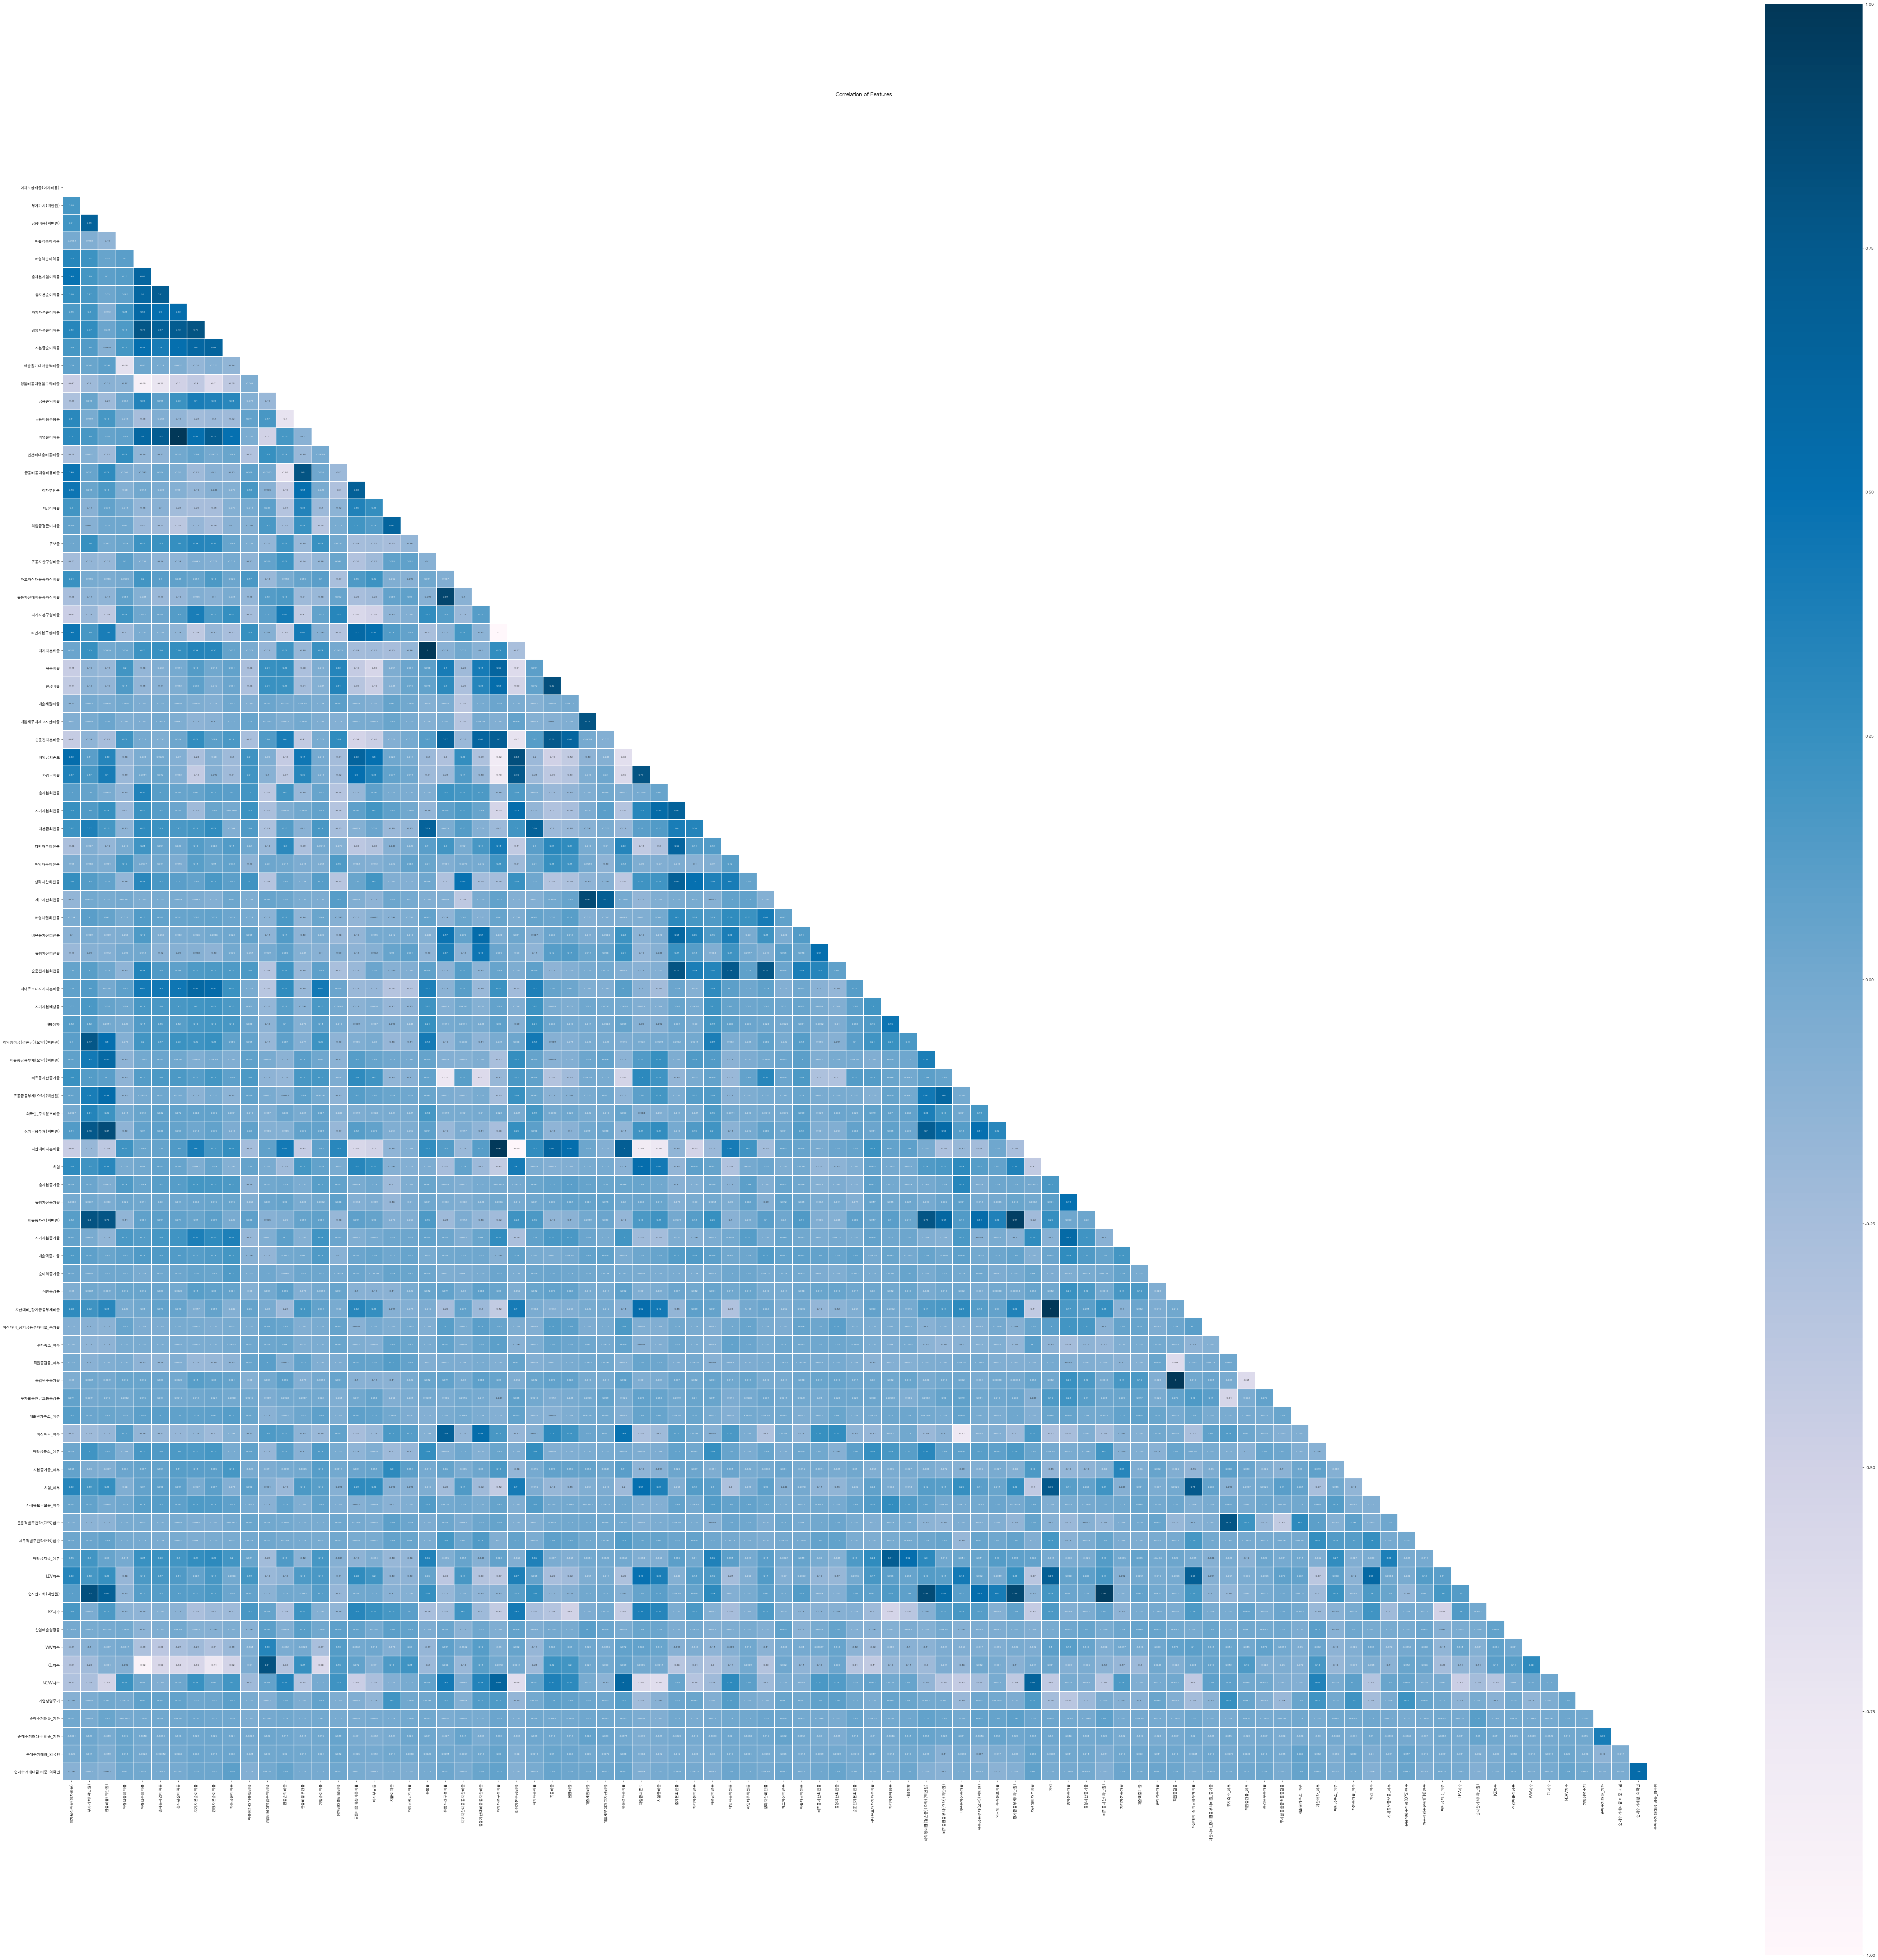

In [1640]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# plt.rcParams['font.family'] = 'Malgun Gothic'
df_corr = x_scaled_stan.corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


colormap = plt.cm.PuBu
plt.figure(figsize=(100, 100))
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(x_scaled_stan.astype(float).corr(), linewidths = 0.1, mask=mask ,vmax = 1.0, 
            vmin= -1.0 , square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 6})

#### 정규성검정 만족하는 컬럼 확인

In [1641]:
# 정규성 검정을 하나의 함수로
from scipy.stats import shapiro, anderson, kstest, jarque_bera, normaltest

def normal_test(test_name,x):
    normal = []
    notnormal = []
    if test_name == 'shapiro':
        for var in x.columns :
            stat, p  = shapiro(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'anderson':
        for var in x.columns :
            result  = anderson(x[var].values,dist='norm')
            normality = 0
            for i in range(len(result.critical_values)):
                # sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    normality +=1
                else :
                    normality +=0
            if normality > 2.5 :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'kstest':
        for var in x.columns :
            stat,p  = kstest(x[var].values, "norm")
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    
    elif test_name == 'jarque_bera':
        for var in x.columns :
            stat,p  = jarque_bera(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'normaltest':
        for var in x.columns :
            stat, p  = normaltest(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    else:
        pass
    return pd.DataFrame(normal, columns = ['normal']),pd.DataFrame(notnormal, columns = ['notnormal'])

In [1642]:
# 1) shapiro
## normal
## 귀무가설을 기각하지 못했다 -> 정규분포를 따른다
## notnormal
## 귀무가설을 기각 대립가설 채택 -> data 분포가 정규분포를 따르지 않는다.
normal_s,notnormal_s = normal_test('shapiro',x_scaled_robust)
normal_s

Empty DataFrame
Columns: [normal]
Index: []

In [1643]:
# 2) anderson test
normal_a,notnormal_a = normal_test('anderson',x_scaled_robust)
normal_a

Empty DataFrame
Columns: [normal]
Index: []

In [1644]:
# 3) ks test
normal_ks,notnormal_ks = normal_test('kstest',x_scaled_robust)
normal_ks

Empty DataFrame
Columns: [normal]
Index: []

In [1645]:
# 4) jarque_bera test
normal_jb,notnormal_jb = normal_test('jarque_bera',x_scaled_robust)
normal_jb

Empty DataFrame
Columns: [normal]
Index: []

In [1646]:
# 5) normaltest
normal_n,notnormal_n = normal_test('normaltest',x_scaled_robust)
normal_n

Empty DataFrame
Columns: [normal]
Index: []

## 1. 등분산 검정

In [1647]:
x_등분산 = pd.concat([x_scaled_stan, y_scale], axis=1)
x_등분산

이자보상배율(이자비용)  부가가치(백만원)  금융비용(백만원)   매출액총이익률   매출액순이익률  총자본사업이익률  \
0        -0.099354  -0.654294  -0.318244 -0.582084  0.251468 -0.063259   
1         0.730534   0.372174   0.724941  0.409289  0.418163  0.529331   
2         0.703802   1.503796  -0.455033 -0.137675  0.452385  0.559634   
3         0.732964   4.737546   4.787690  0.033872  0.236013  0.579836   
4         0.691652   1.173865   0.027526  0.028278  0.793502  0.493417   
...            ...        ...        ...       ...       ...       ...   
1050     -2.101777  -0.425234  -0.376302  2.773044 -4.360512 -1.116005   
1051     -2.270671  -0.395941  -0.362770  0.719442  0.092501 -0.075605   
1052     -0.354517  -0.309125  -0.334024 -1.091755  0.300869 -0.242832   
1053     -0.519766  -0.283782  -0.343901 -0.372000  0.371245 -0.168758   
1054      0.622393  -0.361534  -0.351854  0.291194  0.475567  0.449646   

       총자본순이익률  자기자본순이익률  경영자본순이익률   자본금순이익률  ...   산업매출성장률      WW지수  \
0     0.051028  0.207554  0.172517  0.528453  ...  0.101979  0.220376   
1     0.361731  0.559251  0.518211  0.022122  ...  0.663923  0.218310   
2     0.341297  0.510816  0.553797 -0.006605  ...  0.760507 -0.089646   
3     0.109187  0.087550  0.207377 -1.681962  ... -3.093570 -0.009085   
4     2.543991  1.056977  1.232839  1.633900  ...  1.013160  0.258706   
...        ...       ...       ...       ...  ...       ...       ...   
1050 -0.203613  0.181167 -0.513787  0.233471  ... -0.426311  1.241712   
1051  0.325579  0.554913  0.523295  0.544368  ...  0.395449  0.092873   
1052  0.228648  0.421174  0.387487  0.213259  ... -0.426311  0.995003   
1053  0.027974  0.079959  0.072295  0.217477  ...  0.416178  0.358800   
1054  0.382166  0.593951  0.623517  0.613439  ... -0.426311 -1.421112   

          CL지수    NCAV지수    기업생명주기  순매수거래량_기관  순매수거래대금 비중_기관  순매수거래량_외국인  \
0    -0.317771  0.415598 -1.114042   0.024533       0.096238   -0.123460   
1    -0.405031 -2.262724 -0.344353   0.038086       0.300387    0.053200   
2    -0.505457  0.453985  1.964712   0.089427       0.577339   -0.007082   
3    -0.388318 -0.774597 -1.114042  -0.216738      -0.197528   -0.357690   
4    -0.774695  0.606938  1.964712   0.025537       0.087807    0.039703   
...        ...       ...       ...        ...            ...         ...   
1050  2.317700  0.559950 -1.114042   0.030190       0.100079   -0.038666   
1051  0.079650  0.451341 -1.114042   0.023785       0.091155   -0.004660   
1052  0.248312  0.339261 -1.114042  -0.071149      -0.989799    0.047612   
1053 -0.340918  0.671118  1.964712  -0.111995      -0.413133    0.062834   
1054 -0.487881  0.365041 -0.344353  -0.020862      -0.074404    0.035500   

      순매수거래대금 비중_외국인  회생여부  
0           0.068885     0  
1           0.152273     1  
2          -0.493950     1  
3          -1.560362     1  
4           0.110014     0  
...              ...   ...  
1050       -0.392284     0  
1051       -0.248491     0  
1052        0.043964     0  
1053       -0.029470     1  
1054       -0.119446     0  

[1055 rows x 91 columns]

In [1648]:
# H가 1인 경우 이분산성 / H가 0인 경우 등분산성
from scipy.stats import bartlett
def bartlett_test(col, p_value = 0.05, H = 1):
    list= []
    for i in col:
        T, p_val =bartlett(x_등분산[x_등분산['회생여부']==1][i], x_등분산[x_등분산['회생여부']==0][i]) 
        list.append([i, p_val])

    list = pd.DataFrame(list, columns = ['변수', 'p_value'])
    if H == 1:
        a = list[(list['p_value'] < p_value)][['변수', 'p_value']].sort_values('p_value')
        return a
    else:
        a = list[(list['p_value'] >= p_value)][['변수', 'p_value']].sort_values('p_value')
        return a

In [1649]:
# 이분산성 변수
x_hetero = bartlett_test(x_scaled_stan.columns, H = 1)
x_hetero

변수       p_value
86            순매수거래량_기관  6.121602e-55
11          영업비용대영업수익비율  1.650801e-54
6               총자본순이익률  3.672076e-49
14               기업순이익률  1.567554e-48
5              총자본사업이익률  3.559608e-46
13              금융비용부담률  4.929496e-45
4               매출액순이익률  5.301074e-43
46              자기자본배당률  2.180961e-33
83                 CL지수  1.230940e-26
7              자기자본순이익률  2.233082e-25
45          사내유보대자기자본비율  2.369113e-22
8              경영자본순이익률  2.404089e-18
12               금융손익비율  7.341898e-17
42             비유동자산회전률  3.235153e-13
19             차입금평균이자율  4.492997e-12
47                 배당성향  7.760951e-11
88           순매수거래량_외국인  3.878669e-10
44             순운전자본회전률  4.688013e-10
30          매입채무대재고자산비율  1.272045e-09
87        순매수거래대금 비중_기관  1.899813e-09
57              유형자산증가율  1.525547e-07
52           외국인_주식분포비율  1.612399e-07
66             직원증감률_여부  1.725468e-07
10           매출원가대매출액비율  1.055808e-06
59              자기자본증가율  1.080095e-06
60               매출액증가율  5.374451e-06
16           금융비용대총비용비율  6.879570e-06
82                 WW지수  7.995661e-06
56               총자본증가율  1.094840e-05
28                 현금비율  2.618764e-05
62                직원증감률  8.131117e-05
67              종업원수증가율  8.131117e-05
74           사내유보금보유_여부  9.669464e-05
33                차입금비율  1.155691e-04
9               자본금순이익률  1.156315e-04
89       순매수거래대금 비중_외국인  4.620530e-04
77             배당금지급_여부  5.321584e-04
37              타인자본회전률  1.272154e-03
3               매출액총이익률  1.816911e-03
76       재무적범주전략(FIN)변수  3.238118e-03
80                 KZ지수  3.940382e-03
48  이익잉여금(결손금)(요약)(백만원)  4.298539e-03
15            인건비대총비용비율  4.820309e-03
43              유형자산회전율  4.972977e-03
79           순자산가치(백만원)  6.271714e-03
84               NCAV지수  7.171413e-03
69            매출원가축소_여부  7.638819e-03
17                이자부담률  8.971646e-03
35              자기자본회전률  1.320602e-02
1             부가가치(백만원)  1.445774e-02
18                지급이자율  1.780843e-02
34               총자본회전률  2.075277e-02
31              순운전자본비율  2.206224e-02
39              당좌자산회전률  2.518845e-02
71             배당금축소_여부  2.612825e-02
51      유동금융부채(요약)(백만원)  2.910525e-02
49     비유동금융부채(요약)(백만원)  3.323394e-02

In [1650]:
# 등분산성 변수
x_homo = bartlett_test(x_scaled_stan.columns, H = 0)
x_homo

변수   p_value
20                유보율  0.057368
36             자본금회전률  0.058797
61             순이익증가율  0.063176
26             자기자본배율  0.087260
50           비유동자산증가율  0.095883
55                 차입  0.103832
63      자산대비_장기금융부채비율  0.103832
29             매출채권비율  0.115379
0        이자보상배율(이자비용)  0.117012
41            매출채권회전률  0.127689
21           유동자산구성비율  0.138196
40            재고자산회전률  0.163592
27               유동비율  0.173739
81            산업매출성장률  0.175318
23       유동자산대비유동자산비율  0.199791
32             차입금의존도  0.201380
58         비유동자산(백만원)  0.210977
38            매입채무회전률  0.312536
54           자산대비자본비율  0.352805
64  자산대비_장기금융부채비율_증가율  0.419974
85             기업생명주기  0.423233
2           금융비용(백만원)  0.525180
25           타인자본구성비율  0.551781
68        투자활동현금흐름증감률  0.712485
73              차입_여부  0.728414
75     운용적범주전략(OPS)변수  0.767438
78              LEV지수  0.777433
24           자기자본구성비율  0.856047
22        재고자산대유동자산비율  0.914911
70            자산매각_여부  0.932892
65            투자축소_여부  0.937611
53        장기금융부채(백만원)  0.955156
72           자본증가율_여부  0.979627

## 2. t-test

In [1651]:
# 2) t_test
import scipy.stats as stats
def t_test(col, col_h0, col_h1, p_value = 0.05):
    list= []
    for i in col:
        if (col_h0['변수']==i).any():
            t_stat, p_val = stats.ttest_ind(x_등분산[x_등분산['회생여부']==1][i], x_등분산[x_등분산['회생여부']==0][i], equal_var=True)
            list.append([i, p_val])
        elif (col_h1['변수']==i).any():
            t_stat, p_val = stats.ttest_ind(x_등분산[x_등분산['회생여부']==1][i], x_등분산[x_등분산['회생여부']==0][i], equal_var=False)
            list.append([i, p_val])

    list = pd.DataFrame(list, columns = ['변수', 'p_value'])
    a = list[(list['p_value'] < p_value)][['변수', 'p_value']].sort_values('p_value')
    return a

In [1652]:
# 2) t_test 결과 p_value < 0.05보다 작은 유의한 변수 가져오기
x_ttest = t_test(x_scaled_stan.columns, x_homo, x_hetero, p_value=0.05)
print("유의한 피쳐 수 :", len(x_ttest))
x_ttest.sort_values(by="변수", ascending=True)

유의한 피쳐 수 : 44


변수       p_value
83                 CL지수  8.123616e-10
80                 KZ지수  3.112875e-04
84               NCAV지수  3.196325e-03
82                 WW지수  7.995102e-05
8              경영자본순이익률  7.605632e-11
16           금융비용대총비용비율  1.033984e-07
13              금융비용부담률  1.517274e-07
12               금융손익비율  1.027827e-06
14               기업순이익률  2.290065e-06
39              당좌자산회전률  2.001434e-02
4               매출액순이익률  1.757289e-12
69            매출원가축소_여부  1.959505e-02
77             배당금지급_여부  5.899849e-05
71             배당금축소_여부  8.158316e-04
47                 배당성향  1.058826e-02
1             부가가치(백만원)  1.198386e-02
42             비유동자산회전률  1.434460e-02
45          사내유보대자기자본비율  1.277961e-10
81              산업매출성장률  5.050468e-03
31              순운전자본비율  9.272571e-04
44             순운전자본회전률  1.554775e-05
11          영업비용대영업수익비율  1.826035e-13
21             유동자산구성비율  2.773806e-02
20                  유보율  3.407916e-03
48  이익잉여금(결손금)(요약)(백만원)  3.436870e-03
17                이자부담률  4.628088e-03
24             자기자본구성비율  6.043425e-03
46              자기자본배당률  6.370894e-05
26               자기자본배율  3.340063e-03
7              자기자본순이익률  1.263367e-10
9               자본금순이익률  5.365486e-05
36               자본금회전률  1.827059e-04
54             자산대비자본비율  3.608868e-03
18                지급이자율  2.315645e-04
66             직원증감률_여부  3.415904e-03
73                차입_여부  2.783900e-02
33                차입금비율  1.313598e-04
32               차입금의존도  6.560673e-07
19             차입금평균이자율  7.431923e-04
5              총자본사업이익률  9.973607e-11
6               총자본순이익률  2.784430e-07
34               총자본회전률  2.980177e-06
25             타인자본구성비율  5.304495e-03
37              타인자본회전률  8.059607e-06

In [1653]:
ttest_col = list(x_ttest["변수"])
ttest_col

['영업비용대영업수익비율',
 '매출액순이익률',
 '경영자본순이익률',
 '총자본사업이익률',
 '자기자본순이익률',
 '사내유보대자기자본비율',
 'CL지수',
 '금융비용대총비용비율',
 '금융비용부담률',
 '총자본순이익률',
 '차입금의존도',
 '금융손익비율',
 '기업순이익률',
 '총자본회전률',
 '타인자본회전률',
 '순운전자본회전률',
 '자본금순이익률',
 '배당금지급_여부',
 '자기자본배당률',
 'WW지수',
 '차입금비율',
 '자본금회전률',
 '지급이자율',
 'KZ지수',
 '차입금평균이자율',
 '배당금축소_여부',
 '순운전자본비율',
 'NCAV지수',
 '자기자본배율',
 '유보율',
 '직원증감률_여부',
 '이익잉여금(결손금)(요약)(백만원)',
 '자산대비자본비율',
 '이자부담률',
 '산업매출성장률',
 '타인자본구성비율',
 '자기자본구성비율',
 '배당성향',
 '부가가치(백만원)',
 '비유동자산회전률',
 '매출원가축소_여부',
 '당좌자산회전률',
 '유동자산구성비율',
 '차입_여부']

In [1561]:
# # 3) t test 다른 방법 : Logit Ttest
# import statsmodels.api as sm

# # 3-1) 상수항 추가
# x_ = sm.add_constant(x_scaled_stan, has_constant = "add")

# # 3-2) 회귀모델 적합
# multi_model1 = sm.Logit(x_등분산[['회생여부']], x_)
# fitted_multi_model1 = multi_model1.fit()

# # 3-3) 결과 출력
# fitted_multi_model1.summary()

## 3. VIF

In [1654]:
col_유의 = list(x_ttest["변수"])
X_train_유의 = x_scaled_stan[col_유의]

In [1655]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(X_train_유의.values, i) for i in range(X_train_유의.shape[1])]
vif["features"] = X_train_유의.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

VIF Factor             features
0   1392.734925              총자본순이익률
1   1371.415657               기업순이익률
2    259.582308             타인자본구성비율
3    242.827049             자기자본구성비율
4    214.340107               자기자본배율
5    207.908015                  유보율
6     53.601202             자산대비자본비율
7     16.283089              매출액순이익률
8     13.461739             순운전자본회전률
9     11.600036              순운전자본비율
10    10.942618          영업비용대영업수익비율
11     9.641261               총자본회전률
12     9.287836             유동자산구성비율
13     8.982445           금융비용대총비용비율
14     8.123592              타인자본회전률
15     7.958212             경영자본순이익률
16     7.663069                 CL지수
17     7.461693               차입금의존도
18     6.878442                차입금비율
19     5.626313             총자본사업이익률
20     5.293407             자기자본순이익률
21     4.835687               자본금회전률
22     4.694602              당좌자산회전률
23     3.847606              금융비용부담률
24     3.442350  이익잉여금(결손금)(요약)(백만원)
25     3.280884                이자부담률
26     3.275911            부가가치(백만원)
27     2.902909               NCAV지수
28     2.822383             배당금지급_여부
29     2.819617               금융손익비율
30     2.507248                지급이자율
31     2.475705              자본금순이익률
32     2.403543              자기자본배당률
33     2.315196                 KZ지수
34     2.194297             비유동자산회전률
35     2.126361          사내유보대자기자본비율
36     2.103954                차입_여부
37     2.017595             차입금평균이자율
38     1.451126                 배당성향
39     1.332342                 WW지수
40     1.294750             배당금축소_여부
41     1.113097             직원증감률_여부
42     1.088802              산업매출성장률
43     1.070483            매출원가축소_여부

## 4. Wrapper방법

### 4-2. Stepwise

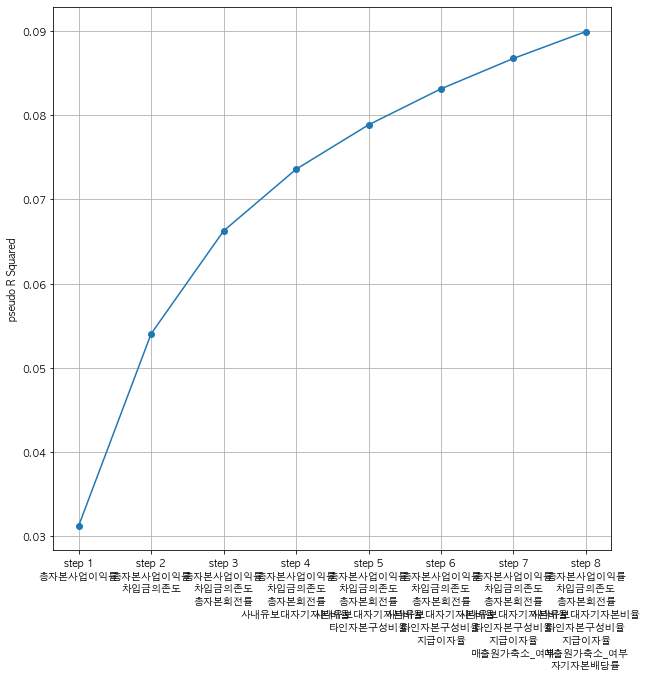

In [1659]:
def stepwise_feature_selection(feature, target, variables):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    import pandas as pd
    warnings.filterwarnings("ignore")
    
    y = target ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = feature[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.Logit(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = feature[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.Logit(y,selected_X).fit(disp=0).pvalues[1:]
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            presudo_r_squared = sm.Logit(y,sm.add_constant(feature[selected_variables])).fit(disp=0).prsquared
            r_squared.append(presudo_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    
    # 시각화
    fig = plt.figure(figsize=(10,10))
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)])
    plt.plot(steps,r_squared, marker='o')
    plt.ylabel('pseudo R Squared')
    plt.grid(True)
    plt.show()

    return selected_variables
    
selected_variables = stepwise_feature_selection(x_scaled_stan, y_scale, x_scaled_stan.columns.tolist())

## 5. Embbeded Methods

### 5-1. Lasso

In [1660]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter('ignore')

lasso_model = LogisticRegression()
param_grid = {'penalty' : ['l1'], 
                'C' : [0.001, 0.01, 0.1, 1, 2, 5, 10],
                'solver' : ['liblinear']}

grid_search = GridSearchCV(lasso_model, param_grid=param_grid, return_train_score=True, cv=5)
grid_search.fit(x_scaled_stan, y_scale)

df = pd.DataFrame(grid_search.cv_results_)
df = df.sort_values(by=['rank_test_score'], ascending=True)
df[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
print('GridSearchCV 최적 파라미터:', grid_search.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_search.best_score_))

GridSearchCV 최적 파라미터: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV 최고 정확도:0.6540


In [1663]:
lasso_best = LogisticRegression(C=0.04,penalty='l1',solver='liblinear').fit(x_scaled_stan, y_scale)

df_lasso = pd.DataFrame()
df_lasso['feature'] = x_scaled_stan.columns
df_lasso['coef'] = lasso_best.coef_[0]
df_lasso.drop(df_lasso[df_lasso['coef']==0].index, inplace=True)
df_lasso

feature      coef
5      총자본사업이익률  0.083404
8      경영자본순이익률  0.015155
11  영업비용대영업수익비율 -0.167593
16   금융비용대총비용비율 -0.047391
18        지급이자율 -0.020209
30  매입채무대재고자산비율  0.016252
32       차입금의존도 -0.185659
34       총자본회전률  0.124702
45  사내유보대자기자본비율  0.134212
46      자기자본배당률  0.095928
66     직원증감률_여부 -0.004002
69    매출원가축소_여부  0.044178
71     배당금축소_여부  0.003839
81      산업매출성장률 -0.022983

In [1664]:
# 라쏘에서 선택된 피처
lasso_features = df_lasso['feature'].values.tolist()
print('Lasso에서 선택된 피처 수 {0:1.0f}'.format(len(df_lasso)), '개')
lasso_features

Lasso에서 선택된 피처 수 14 개


['총자본사업이익률',
 '경영자본순이익률',
 '영업비용대영업수익비율',
 '금융비용대총비용비율',
 '지급이자율',
 '매입채무대재고자산비율',
 '차입금의존도',
 '총자본회전률',
 '사내유보대자기자본비율',
 '자기자본배당률',
 '직원증감률_여부',
 '매출원가축소_여부',
 '배당금축소_여부',
 '산업매출성장률']

## 6. Filter Method

### selectKBest
: 각 피처와 타겟 사이에 통계적 관계(상관계수)를 계산 후, 유의미하다고 판단되는 피처를 선택하는 방식, 피처 선택 후 따로 모델 적용이 필요가 없다.

In [1670]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# f_classif_time=time.time()

f_classif_selector = SelectKBest(f_classif, k=13)
f_classif_selector.fit(x_scaled_stan, y_scale)
# print("f_classif_selector 수행시간 {0:.1f}초" .format(time.time()-f_classif_time))

f_classif_scores = pd.DataFrame()
f_classif_scores['Feature'] = x_scaled_stan.columns
f_classif_scores['Support'] = f_classif_selector.get_support()
f_classif_scores[f_classif_scores["Support"]==True]

Feature  Support
4       매출액순이익률     True
5      총자본사업이익률     True
7      자기자본순이익률     True
8      경영자본순이익률     True
11  영업비용대영업수익비율     True
16   금융비용대총비용비율     True
32       차입금의존도     True
34       총자본회전률     True
37      타인자본회전률     True
44     순운전자본회전률     True
45  사내유보대자기자본비율     True
46      자기자본배당률     True
83         CL지수     True

In [1671]:
list_kbest = list(f_classif_scores[f_classif_scores["Support"]==True]["Feature"])
list_kbest

['매출액순이익률',
 '총자본사업이익률',
 '자기자본순이익률',
 '경영자본순이익률',
 '영업비용대영업수익비율',
 '금융비용대총비용비율',
 '차입금의존도',
 '총자본회전률',
 '타인자본회전률',
 '순운전자본회전률',
 '사내유보대자기자본비율',
 '자기자본배당률',
 'CL지수']

---
# Modeling

### 1. K-fold : data split
- k1 : 2012, 2013
- k2 : 2014, 2015
- k3 : 2016, 2017

In [1577]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

In [83]:
list_col_select = ["회계년도","회생여부",
        '자기자본순이익률',
    '영업비용대영업수익비율',
    '재고자산회전률',
    '배당성향',
    '비유동금융부채(요약)(백만원)',
    '유동금융부채(요약)(백만원)',
    '유형자산증가율',
    '비유동자산(백만원)',
    '재고자산증가율',
    '순이익증가율',
    '직원증감률',
    'CL지수',
    '순매수거래량_기관',
    '순매수거래대금 비중_기관',
    '순매수거래량_외국인']
train_set_modeling = train_set[list_col_select]

In [84]:
from sklearn.preprocessing import RobustScaler

y_train = train_set_modeling[["회생여부", "회계년도"]]
X_train = train_set_modeling.drop(["회생여부", "회계년도"],axis=1)

x.feature = X_train.columns

# StandardScaler객체 생성
scaler_robust = RobustScaler()
scaler_robust.fit(X_train)
data_scaled_robust = scaler_robust.transform(X_train)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled_robust = pd.DataFrame(data = data_scaled_robust, columns=x.feature)
x_scaled_robust

train_set_modeling = pd.concat([y_train,x_scaled_robust], axis=1)
train_set_modeling.reset_index(drop=True, inplace=True)

In [85]:
X_k1 = train_set_modeling[(train_set_modeling["회계년도"]==2012)|(train_set_modeling["회계년도"]==2013)]
X_k2 = train_set_modeling[(train_set_modeling["회계년도"]==2014)|(train_set_modeling["회계년도"]==2015)]
X_k3 = train_set_modeling[(train_set_modeling["회계년도"]==2016)|(train_set_modeling["회계년도"]==2017)]

target = "회생여부"
X_k1.reset_index(drop=True, inplace=True)
X_k1_y = X_k1[target]
X_k1_x = X_k1.drop(["회계년도","회생여부",target], axis=1)

X_k2.reset_index(drop=True, inplace=True)
X_k2_y = X_k2[target]
X_k2_x = X_k2.drop(["회계년도","회생여부",target], axis=1)

X_k3.reset_index(drop=True, inplace=True)
X_k3_y = X_k3[target]
X_k3_x = X_k3.drop(["회계년도","회생여부",target], axis=1)

k1이 validation set일 때

In [86]:
# X_k1_y / X_k1_x

val_k1 = train_set_modeling[((train_set_modeling["회계년도"]==2012)|(train_set_modeling["회계년도"]==2013)).map(func_not)]

y_train_k1 = val_k1[target]
X_train_k1 = val_k1.drop(["회계년도","회생여부",target], axis=1)

In [87]:
models = [
    RandomForestClassifier(),
    LogisticRegression(),
]


rdict={'model':[],'acc_train':[], 'auc_train':[], 'acc_val':[],'precision':[],'recall':[],'f1_score':[], 'auc_val':[]}

    
for clf in models:
    clf = clf.fit(X_train_k1, y_train_k1)
#1열:Test
    y_hat = clf.predict(X_train_k1)
    results_train  = (round(accuracy_score(y_train_k1,y_hat),2),round(roc_auc_score(y_train_k1,y_hat),2))
#2열:Val
    y_hat = clf.predict(X_k1_x)
    results = (round(accuracy_score(X_k1_y,y_hat),2),
                    round(precision_score(X_k1_y,y_hat),2),
                    round(recall_score(X_k1_y,y_hat),2),
                    round(f1_score(X_k1_y,y_hat),2),
                    round(roc_auc_score(X_k1_y,y_hat),2))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0]); rdict['auc_train'].append(results_train[1])
    rdict['acc_val'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['auc_val'].append(results[4])   

    print(results_train, results)

rdf1 = pd.DataFrame(data=rdict)
rdf1

(1.0, 1.0) (0.61, 0.39, 0.29, 0.34, 0.53)
(0.62, 0.58) (0.59, 0.38, 0.38, 0.38, 0.53)


model  acc_train  auc_train  \
0  (DecisionTreeClassifier(max_features='sqrt', r...       1.00       1.00   
1                               LogisticRegression()       0.62       0.58   

   acc_val  precision  recall  f1_score  auc_val  
0     0.61       0.39    0.29      0.34     0.53  
1     0.59       0.38    0.38      0.38     0.53

k2가 validation set일 때

In [88]:
# X_k2_y
# X_k2_x

val_k2 = train_set_modeling[((train_set_modeling["회계년도"]==2014)|(train_set_modeling["회계년도"]==2015)).map(func_not)]

y_train_k2 = val_k2[target]
X_train_k2 = val_k2.drop(["회계년도","회생여부",target], axis=1)

In [89]:
models = [
    RandomForestClassifier(),
    LogisticRegression(),
]


rdict={'model':[],'acc_train':[], 'auc_train':[], 'acc_val':[],'precision':[],'recall':[],'f1_score':[], 'auc_val':[]}

    
for clf in models:
    clf = clf.fit(X_train_k2, y_train_k2)
#1열:Test
    y_hat = clf.predict(X_train_k2)
    results_train  = (round(accuracy_score(y_train_k2,y_hat),2),round(roc_auc_score(y_train_k2,y_hat),2))
#2열:Val
    y_hat = clf.predict(X_k2_x)
    results = (round(accuracy_score(X_k2_y,y_hat),2),
                    round(precision_score(X_k2_y,y_hat),2),
                    round(recall_score(X_k2_y,y_hat),2),
                    round(f1_score(X_k2_y,y_hat),2),
                    round(roc_auc_score(X_k2_y,y_hat),2))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0]); rdict['auc_train'].append(results_train[1])
    rdict['acc_val'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['auc_val'].append(results[4])   

    print(results_train, results)

rdf2 = pd.DataFrame(data=rdict)
rdf2

(1.0, 1.0) (0.55, 0.56, 0.11, 0.18, 0.52)
(0.65, 0.55) (0.55, 0.52, 0.25, 0.34, 0.53)


model  acc_train  auc_train  \
0  (DecisionTreeClassifier(max_features='sqrt', r...       1.00       1.00   
1                               LogisticRegression()       0.65       0.55   

   acc_val  precision  recall  f1_score  auc_val  
0     0.55       0.56    0.11      0.18     0.52  
1     0.55       0.52    0.25      0.34     0.53

k3가 validation set일 때

In [90]:
# X_k3_y
# X_k3_x

val_k3 = train_set_modeling[((train_set_modeling["회계년도"]==2016)&(train_set_modeling["회계년도"]==2017)).map(func_not)]

y_train_k3 = val_k3[target]
X_train_k3 = val_k3.drop(["회계년도","회생여부",target], axis=1)

In [91]:
models = [
    RandomForestClassifier(),
    LogisticRegression(),
]


rdict={'model':[],'acc_train':[], 'auc_train':[], 'acc_val':[],'precision':[],'recall':[],'f1_score':[], 'auc_val':[]}

    
for clf in models:
    clf = clf.fit(X_train_k3, y_train_k3)
#1열:Test
    y_hat = clf.predict(X_train_k3)
    results_train  = (round(accuracy_score(y_train_k3,y_hat),2),round(roc_auc_score(y_train_k3,y_hat),2))
#2열:Val
    y_hat = clf.predict(X_k3_x)
    results = (round(accuracy_score(X_k3_y,y_hat),2),
                    round(precision_score(X_k3_y,y_hat),2),
                    round(recall_score(X_k3_y,y_hat),2),
                    round(f1_score(X_k3_y,y_hat),2),
                    round(roc_auc_score(X_k3_y,y_hat),2))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0]); rdict['auc_train'].append(results_train[1])
    rdict['acc_val'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['auc_val'].append(results[4])   

    print(results_train, results)

rdf3 = pd.DataFrame(data=rdict)
rdf3 

(1.0, 1.0) (1.0, 1.0, 1.0, 1.0, 1.0)
(0.61, 0.55) (0.63, 0.4, 0.31, 0.35, 0.54)


model  acc_train  auc_train  \
0  (DecisionTreeClassifier(max_features='sqrt', r...       1.00       1.00   
1                               LogisticRegression()       0.61       0.55   

   acc_val  precision  recall  f1_score  auc_val  
0     1.00        1.0    1.00      1.00     1.00  
1     0.63        0.4    0.31      0.35     0.54

In [92]:
rdf1

model  acc_train  auc_train  \
0  (DecisionTreeClassifier(max_features='sqrt', r...       1.00       1.00   
1                               LogisticRegression()       0.62       0.58   

   acc_val  precision  recall  f1_score  auc_val  
0     0.61       0.39    0.29      0.34     0.53  
1     0.59       0.38    0.38      0.38     0.53

In [93]:
rdf2

model  acc_train  auc_train  \
0  (DecisionTreeClassifier(max_features='sqrt', r...       1.00       1.00   
1                               LogisticRegression()       0.65       0.55   

   acc_val  precision  recall  f1_score  auc_val  
0     0.55       0.56    0.11      0.18     0.52  
1     0.55       0.52    0.25      0.34     0.53

In [94]:
rdf3

model  acc_train  auc_train  \
0  (DecisionTreeClassifier(max_features='sqrt', r...       1.00       1.00   
1                               LogisticRegression()       0.61       0.55   

   acc_val  precision  recall  f1_score  auc_val  
0     1.00        1.0    1.00      1.00     1.00  
1     0.63        0.4    0.31      0.35     0.54

---
# Feature select for modeling

In [1673]:
# ttest_col
# selected_variables
# lasso_features
# list_kbest

list_ttest = list(ttest_col)
list_stepwise = list(selected_variables)
list_lasso = list(lasso_features)
list_kbest = list(list_kbest)

In [1674]:
list_col_all = pd.Series(df_부실징후.drop(["회사명","거래소코드","회계년도","회생여부"], axis=1).columns)

In [1675]:
def func_ttest(x):
    if x in list_ttest:
        return 1
    else:
        return 0

def func_stepwise(x):
    if x in list_stepwise:
        return 1
    else:
        return 0

def func_lasso(x):
    if x in list_lasso:
        return 1
    else:
        return 0

def func_kbest(x):
    if x in list_kbest:
        return 1
    else:
        return 0

In [1676]:
feature_counts = pd.DataFrame()
feature_counts['Feature'] = list_col_all
feature_counts['ttest'] = list_col_all.map(func_ttest)
feature_counts['stepwise'] = list_col_all.map(func_stepwise)
feature_counts['lasso'] = list_col_all.map(func_lasso)
feature_counts['kbest'] = list_col_all.map(func_kbest)
feature_counts["total"] = feature_counts["ttest"]+feature_counts["stepwise"]+feature_counts["lasso"]+feature_counts["kbest"]
feature_final = feature_counts[feature_counts["total"]>2]
list_feature_final = list(feature_final["Feature"])
print("선택된 피쳐수 :", len(list_feature_final))
feature_final


선택된 피쳐수 : 10


Feature  ttest  stepwise  lasso  kbest  total
5      총자본사업이익률      1         1      1      1      4
8      경영자본순이익률      1         0      1      1      3
11  영업비용대영업수익비율      1         0      1      1      3
16   금융비용대총비용비율      1         0      1      1      3
18        지급이자율      1         1      1      0      3
32       차입금의존도      1         1      1      1      4
34       총자본회전률      1         1      1      1      4
45  사내유보대자기자본비율      1         1      1      1      4
46      자기자본배당률      1         1      1      1      4
69    매출원가축소_여부      1         1      1      0      3

In [1677]:
# list(list_col_all)
list_feature_final

['총자본사업이익률',
 '경영자본순이익률',
 '영업비용대영업수익비율',
 '금융비용대총비용비율',
 '지급이자율',
 '차입금의존도',
 '총자본회전률',
 '사내유보대자기자본비율',
 '자기자본배당률',
 '매출원가축소_여부']

---
# Test set

In [932]:
# df_부실징후.head(5)

In [931]:
list_domain = [
    'KZ지수',
    'WW지수',
    'CL지수',
    '순매수거래대금 비중_외국인',
    '총자본사업이익률',
    '자기자본순이익률',
    '차입금의존도',
    '총자본회전률',
    '타인자본회전률',
    '자기자본배당률'
]

In [1843]:
# ttest_col
# selected_variables
# lasso_features
# list_kbest
# list_feature_final

df_modeling = df_부실징후[["회계년도","회생여부","이자보상배율(이자비용)"] + list_feature_final]

In [1844]:
# df_modeling = df_부실징후[["회계년도","회생여부"] + list_kbest]

In [1845]:
df_modeling.isna().sum().to_dict()

{'회계년도': 0,
 '회생여부': 0,
 '이자보상배율(이자비용)': 0,
 '총자본사업이익률': 0,
 '경영자본순이익률': 0,
 '영업비용대영업수익비율': 0,
 '금융비용대총비용비율': 0,
 '지급이자율': 0,
 '차입금의존도': 0,
 '총자본회전률': 0,
 '사내유보대자기자본비율': 0,
 '자기자본배당률': 0,
 '매출원가축소_여부': 0}

In [1846]:

# from sklearn.preprocessing import StandardScaler

# y_train_scaling = df_modeling[["회생여부", "회계년도"]]
# X_train_scaling = df_modeling.drop(["회생여부", "회계년도"],axis=1)

# # StandardScaler객체 생성
# scaler_stan = StandardScaler()
# scaler_stan.fit(X_train_scaling)
# data_scaled_stan = scaler_stan.transform(X_train_scaling)

# # transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
# x_scaled_stan = pd.DataFrame(data = data_scaled_stan, columns=X_train_scaling.columns)
# x_scaled_stan

# y_train_scaling.reset_index(drop=True, inplace=True)
# x_scaled_stan.reset_index(drop=True, inplace=True)

# df_modeling = pd.concat([y_train_scaling,x_scaled_stan], axis=1)
# df_modeling.reset_index(drop=True, inplace=True)

In [1847]:

# from sklearn.preprocessing import MinMaxScaler

# y_train_scaling = df_modeling[["회생여부", "회계년도"]]
# X_train_scaling = df_modeling.drop(["회생여부", "회계년도"],axis=1)

# # StandardScaler객체 생성
# scaler_stan = MinMaxScaler()
# scaler_stan.fit(X_train_scaling)
# data_scaled_stan = scaler_stan.transform(X_train_scaling)

# # transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
# x_scaled_stan = pd.DataFrame(data = data_scaled_stan, columns=X_train_scaling.columns)
# x_scaled_stan

# y_train_scaling.reset_index(drop=True, inplace=True)
# x_scaled_stan.reset_index(drop=True, inplace=True)

# df_modeling = pd.concat([y_train_scaling,x_scaled_stan], axis=1)
# df_modeling.reset_index(drop=True, inplace=True)

In [1848]:
from sklearn.preprocessing import RobustScaler

y_train_scaling = df_modeling[["회생여부", "회계년도"]]
X_train_scaling = df_modeling.drop(["회생여부", "회계년도"],axis=1)

# StandardScaler객체 생성
scaler_robust = RobustScaler()
scaler_robust.fit(X_train_scaling)
data_scaled_robust = scaler_robust.transform(X_train_scaling)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled_robust = pd.DataFrame(data = data_scaled_robust, columns=X_train_scaling.columns)
x_scaled_robust

y_train_scaling.reset_index(drop=True, inplace=True)
x_scaled_robust.reset_index(drop=True, inplace=True)

df_modeling = pd.concat([y_train_scaling,x_scaled_robust], axis=1)
df_modeling.reset_index(drop=True, inplace=True)

In [1849]:
# tain : 2012~2016
train_set = df_modeling[((df_modeling["회계년도"]==2015)|(df_modeling["회계년도"]==2016)|(df_modeling["회계년도"]==2017)|(df_modeling["회계년도"]==2018)).map(func_not)]
train_set.reset_index(drop=True, inplace=True)
y_train = train_set[target]
X_train = train_set.drop(["회계년도", target], axis=1)


# test : 2017, 2018
test_set = df_modeling[(df_modeling["회계년도"]==2015)|(df_modeling["회계년도"]==2016)|(df_modeling["회계년도"]==2017)|(df_modeling["회계년도"]==2018)]
test_set.reset_index(drop=True, inplace=True)
y_test = test_set[target]
X_test = test_set.drop(["회계년도",target], axis=1)

In [1850]:
train_set.shape

(694, 13)

In [1851]:
test_set.shape

(361, 13)

In [1852]:
# 오버샘플링
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy='auto')
X_train, y_train = rus.fit_resample(X_train, y_train)

In [1853]:
# # 언더샘플링
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=156)
# X_train, y_train = rus.fit_resample(X_train, y_train)

In [1854]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [1855]:
models = [
    RandomForestClassifier(),
    LogisticRegression(),
    XGBClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
]


rdict={'model':[],'acc_train':[], 'auc_train':[], 'acc_val':[],'precision':[],'recall':[],'f1_score':[], 'AUC_val':[]}

    
for clf in models:
    clf = clf.fit(X_train, y_train)
#1열:Test
    y_hat = clf.predict(X_train)
    results_train  = (round(accuracy_score(y_train,y_hat),2),round(roc_auc_score(y_train,y_hat),2))
#2열:Val
    y_hat = clf.predict(X_test)
    results = (round(accuracy_score(y_test,y_hat),2),
                    round(precision_score(y_test,y_hat),2),
                    round(recall_score(y_test,y_hat),2),
                    round(f1_score(y_test,y_hat),2),
                    round(roc_auc_score(y_test,y_hat),2))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0])
    rdict['auc_train'].append(results_train[1])
    
    rdict['acc_val'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['AUC_val'].append(results[4])   

    print(results_train, results)

rdf3 = pd.DataFrame(data=rdict)
rdf3 

(1.0, 1.0) (0.59, 0.45, 0.53, 0.49, 0.58)
(0.68, 0.68) (0.55, 0.43, 0.79, 0.56, 0.6)
[20:16:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(1.0, 1.0) (0.6, 0.46, 0.53, 0.49, 0.59)
(1.0, 1.0) (0.58, 0.43, 0.53, 0.48, 0.57)
(0.79, 0.79) (0.56, 0.42, 0.58, 0.49, 0.56)


model  acc_train  auc_train  \
0  (DecisionTreeClassifier(max_features='sqrt', r...       1.00       1.00   
1                               LogisticRegression()       0.68       0.68   
2  XGBClassifier(base_score=0.5, booster='gbtree'...       1.00       1.00   
3                           DecisionTreeClassifier()       1.00       1.00   
4                             KNeighborsClassifier()       0.79       0.79   

   acc_val  precision  recall  f1_score  AUC_val  
0     0.59       0.45    0.53      0.49     0.58  
1     0.55       0.43    0.79      0.56     0.60  
2     0.60       0.46    0.53      0.49     0.59  
3     0.58       0.43    0.53      0.48     0.57  
4     0.56       0.42    0.58      0.49     0.56

resampling + girdsearch + winsorizing + feature selection(공통)

In [1712]:
# Packages for EDA 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np 

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
# from datasist.structdata import detect_outliers
from sklearn.metrics import mean_squared_error
# from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
# import category_encoders as ce
import re 

# Modeling and evaluation 
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import classification_report 
import joblib

# Packages options 
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) # Standard figure size for all 
np.seterr(divide='ignore', invalid='ignore', over='ignore') ;

import warnings 
warnings.filterwarnings("ignore")

In [1713]:
from sklearn.tree import DecisionTreeClassifier

In [1714]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [1715]:
bagging = BaggingClassifier(n_jobs=-1)
extraTrees = ExtraTreesClassifier(max_depth=10, n_jobs=-1)
randomForest = RandomForestClassifier(n_jobs=-1)
histGradientBoosting = HistGradientBoostingClassifier()
XGB = XGBClassifier(n_jobs=-1)

model = StackingClassifier([
    ('bagging', bagging),
    ('extraTress', extraTrees),
    ('randomforest', randomForest),
    ('histGradientBoosting', histGradientBoosting),
    ('XGB', XGB)
], n_jobs=-1)

In [1716]:
# -*- coding: utf-8 -*-
import importlib
import sys
importlib.reload(sys)
# sys.setdefaultencoding("UTF-8")

<module 'sys' (built-in)>

In [1717]:
model.fit(X_train, y_train)

/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, In

[20:01:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, In

StackingClassifier(estimators=[('bagging', BaggingClassifier(n_jobs=-1)),
                               ('extraTress',
                                ExtraTreesClassifier(max_depth=10, n_jobs=-1)),
                               ('randomforest',
                                RandomForestClassifier(n_jobs=-1)),
                               ('histGradientBoosting',
                                HistGradientBoostingClassifier()),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytr...
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=-1,
                                              num_parallel_tree=None,
                                              random_state=None, reg_alpha=None,
                                              reg_lambda=None,
                                              scale_pos_weight=None,
                                              subsample=None, tree_method=None,
                                              validate_parameters=None,
                                              verbosity=None))],
                   n_jobs=-1)

In [1718]:
y_pred = model.predict(X_test)

In [1719]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68       109
           1       0.56      0.43      0.49        84

    accuracy                           0.61       193
   macro avg       0.60      0.59      0.58       193
weighted avg       0.60      0.61      0.60       193



In [1720]:
f1_score(y_pred,y_test)

0.4864864864864864

---
# Gridsearch

In [907]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [910]:
from sklearn.model_selection import GridSearchCV

param={
    "min_samples_leaf":[1, 2, 3, 4, 5, 6, 7, 8, 9],
    "max_depth":[2, 3, 4, 5, 6, None],
    "min_samples_split":[2, 3, 4, 5, 6, 7, 8, 9, 10]
}

df = DecisionTreeClassifier()
gs = GridSearchCV(df, param_grid=param, cv=5, refit=True, scoring="f1_macro")

gs.fit(X_train, y_train)

df = gs.best_estimator_
print("train_score : {} ".format(df.score(X_train, y_train)))
print("test_score : {} ".format(df.score(X_test, y_test)))
print(gs.best_score_)
print(gs.best_params_)

train_score : 0.8793292016040831 
test_score : 0.6544502617801047 
0.5449938033505494
{'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 3}


In [911]:
models = [
    DecisionTreeClassifier(max_depth=None, min_samples_leaf=5, min_samples_split=3)
]


rdict={'model':[],'acc_train':[], 'auc_train':[], 'acc_val':[],'precision':[],'recall':[],'f1_score':[], 'auc_val':[]}

    
for clf in models:
    clf = clf.fit(X_train, y_train)
#1열:Test
    y_hat = clf.predict(X_train)
    results_train  = (round(accuracy_score(y_train,y_hat),2),round(roc_auc_score(y_train,y_hat),2))
#2열:Val
    y_hat = clf.predict(X_test)
    results = (round(accuracy_score(y_test,y_hat),2),
                    round(precision_score(y_test,y_hat),2),
                    round(recall_score(y_test,y_hat),2),
                    round(f1_score(y_test,y_hat),2),
                    round(roc_auc_score(y_test,y_hat),2))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0]); rdict['auc_train'].append(results_train[1])
    rdict['acc_val'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['auc_val'].append(results[4])   

    print(results_train, results)

rdf3 = pd.DataFrame(data=rdict)
rdf3 

(0.88, 0.84) (0.65, 0.34, 0.3, 0.32, 0.54)


model  acc_train  auc_train  \
0  DecisionTreeClassifier(min_samples_leaf=5, min...       0.88       0.84   

   acc_val  precision  recall  f1_score  auc_val  
0     0.65       0.34     0.3      0.32     0.54

In [819]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10, scoring="f1")
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.6326609585979502


In [1177]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1, scoring="f1_micro")
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도: 0.7127


In [821]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

In [822]:
grid_params = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

In [823]:
gs = GridSearchCV(knn, grid_params, cv=10, scoring="f1")
gs.fit(X_train, y_train)
print("Best Parameters : ", gs.best_params_)
print("Best Score : ", gs.best_score_)
print("Best Test Score : ", gs.score(X_test, y_test))

Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best Score :  0.7702697851303977
Best Test Score :  0.41921397379912667


In [829]:
models = [
    RandomForestClassifier(max_depth = 12, min_samples_leaf = 8, min_samples_split = 8, n_estimators = 100),
    LogisticRegression ( C = 0.001, penalty = 'l2'),
    XGBClassifier(),
    DecisionTreeClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 5),
    KNeighborsClassifier(metric = 'euclidean', n_neighbors = 1, weights = 'uniform')
]


rdict={'model':[],'acc_train':[], 'auc_train':[], 'acc_val':[],'precision':[],'recall':[],'f1_score':[], 'auc_val':[]}

    
for clf in models:
    clf = clf.fit(X_train, y_train)
#1열:Test
    y_hat = clf.predict(X_train)
    results_train  = (round(accuracy_score(y_train,y_hat),2),round(roc_auc_score(y_train,y_hat),2))
#2열:Val
    y_hat = clf.predict(X_test)
    results = (round(accuracy_score(y_test,y_hat),2),
                    round(precision_score(y_test,y_hat),2),
                    round(recall_score(y_test,y_hat),2),
                    round(f1_score(y_test,y_hat),2),
                    round(roc_auc_score(y_test,y_hat),2))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0]); rdict['auc_train'].append(results_train[1])
    rdict['acc_val'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['auc_val'].append(results[4])   

    print(results_train, results)

rdf3 = pd.DataFrame(data=rdict)
rdf3 

(0.9, 0.9) (0.61, 0.48, 0.55, 0.51, 0.6)
(0.61, 0.61) (0.58, 0.46, 0.68, 0.55, 0.61)
[21:11:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(1.0, 1.0) (0.6, 0.45, 0.45, 0.45, 0.57)
(0.97, 0.97) (0.56, 0.39, 0.37, 0.38, 0.52)
(1.0, 1.0) (0.57, 0.41, 0.41, 0.41, 0.54)


model  acc_train  auc_train  \
0  (DecisionTreeClassifier(max_depth=12, max_feat...       0.90       0.90   
1                        LogisticRegression(C=0.001)       0.61       0.61   
2  XGBClassifier(base_score=0.5, booster='gbtree'...       1.00       1.00   
3        DecisionTreeClassifier(min_samples_split=5)       0.97       0.97   
4  KNeighborsClassifier(metric='euclidean', n_nei...       1.00       1.00   

   acc_val  precision  recall  f1_score  auc_val  
0     0.61       0.48    0.55      0.51     0.60  
1     0.58       0.46    0.68      0.55     0.61  
2     0.60       0.45    0.45      0.45     0.57  
3     0.56       0.39    0.37      0.38     0.52  
4     0.57       0.41    0.41      0.41     0.54

In [ ]:
from xgboost import XGBClassifier

#XGBoost 정의
#파라미터는 이전 글을 참고하여 grid 설정(dict 형태)
xgb= XGBClassifier()

xgb_param_grid={
    'n_estimators' : [100,200,300,400,500],
    'learning_rate' : [0.01,0.05,0.1,0.15],
    'max_depth' : [3,5,7,10,15],
    'gamma' : [0,1,2,3],
    'colsample_bytree' : [0.8,0.9],
    
}

#score종류는 acc,f1,f1_micro,f1_macro등 원하는걸로 설정)
#여기서 설정 파라미터의 갯수(총 4000개의 조합이므로 4000번의 학습이 돌아감)
xgb_grid=GridSearchCV(xgb, param_grid = xgb_param_grid, scoring="f1", n_jobs=-1, verbose = 2)
xgb_grid.fit(X_train, y_train)

#best f1_macro 수치와 best parameter확인
print("best f1_macro : {0: .4f}".format(xgb_grid.best_score_))
print("best param : ",xgb_grid.best_params_)

#dataframe으로 랭킹순보기
result_df = pd.DataFrame(xgb_grid.cv_results_)
result_df.sort_values(by=['rank_test_score'],inplace=True)

#plot
result_df[['params','mean_test_score','rank_test_score']].head(10)

In [ ]:
models = [
    RandomForestClassifier(max_depth=12, min_samples_leaf=8, min_samples_split=8),
    LogisticRegression(C=0.001, penalty="l2"),
    XGBClassifier(),
    DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=6),
    KNeighborsClassifier(metric="manhattan", n_neighbors=1, weights="uniform")
]


rdict={'model':[],'acc_train':[], 'auc_train':[], 'acc_val':[],'precision':[],'recall':[],'f1_score':[], 'auc_val':[]}

    
for clf in models:
    clf = clf.fit(X_train, y_train)
#1열:Test
    y_hat = clf.predict(X_train)
    results_train  = (round(accuracy_score(y_train,y_hat),2),round(roc_auc_score(y_train,y_hat),2))
#2열:Val
    y_hat = clf.predict(X_test)
    results = (round(accuracy_score(y_test,y_hat),2),
                    round(precision_score(y_test,y_hat),2),
                    round(recall_score(y_test,y_hat),2),
                    round(f1_score(y_test,y_hat),2),
                    round(roc_auc_score(y_test,y_hat),2))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0]); rdict['auc_train'].append(results_train[1])
    rdict['acc_val'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['auc_val'].append(results[4])   

    print(results_train, results)

rdf3 = pd.DataFrame(data=rdict)
rdf3 